## Emerging Technologies - Year 4 Project

For our project, we had to create a web service that uses machine learning to make predictions on a data set that we were given called the 'power production'. The goal is to produce a model that will predict wind turbine power, the output from wind speed values, as in the data set. This is my way of tackling the problem.
Starting I went and read the file power production with the aid of pandas import using the 'pd.read_csv' function. I printed out the data and started to mess around with it. I got the first 20 outputs and started to describe the data to find some extra information. After getting the data, the next step for me was to see how the data set will look on the graph. Using the 'matplotlib' import I plotted the graph. It was very hard to see anything as the graph was very densely populated. I started looking online for pieces of information and found a website that aids me with the scaling of the graph [1]. To make the graph more readable I added a grid and labels to the Y and X-axis.

My next step was to create a neural network. I added layers to make my loss as low as I could get. I was able to do this using the 'tenserflow.keras' import. After the layers being added, I complied the model and in the next step fitted it with an epoch of 30,000 and a batch size of 5000. With that, the machine learning began. It takes a few minutes for the machine learning to be complete. With that done, I plotted the graph and compared the predictions and the actual data using 'plt.legend()' function. I was pretty happy with my predictions and began with the web service.

For the web service, I used visual studio code. Inside I started by adding a python web service called 'Web-Service' and an html file called 'home.html'. For the last part, we needed to make it run through docker so I also created a blank docker file. I began by doing the web service.py. First I mapped the specific URL using an appRoute with the import of flask and loaded the data needed to calculate the turbine power [2]. After all the web service is done I started on my html. I made sure the html is simple with the low amount of CSS. I added an input (Enter Speed), output (Gives Turbine Power) and a button that on click would calculate power. Now it was time for the javascript. I needed to get my speed data from webservice and use it to give me the power data. With all that done it would print out the information on to a simple website on the localhost:http://127.0.0.1:5000/.

With all that out of the way, it was time for me to begin with my dockerfile. As mentioned previously I created it before so inside the dockekfile now I added few commands that would allow it to run e.g. which python version is needed for this app, pip install with all the requirements.txt, cmd line to run flask. I also added a .ignoredocker to ignore some unnecessary files whilst building and added a requirements.txt file where inside I have the imports that need to be installed. These are the commands to run the web service from docker.

docker build -t web-service . <br>
docker run -d -p 5000:5000 web-service <br>
docker images <br>
docker kill (CONTAINER ID)


### References
[1] Delf Stack:Set the figsize in figure() Methods to Set Matplotlib Plot Size;https://www.delftstack.com/howto/matplotlib/how-to-change-the-size-and-format-of-a-figure-in-matplotlib/#:~:text=We%20could%20use%20the%20set_figheight,in%20the%20savefig()%20method.

[2] StackOverflow:Answered EpicPandaForce;https://stackoverflow.com/questions/20646822/how-to-serve-static-files-in-flask


In [1]:
#imports
import pandas as pd
import tensorflow as tf
import tensorflow.keras as kr
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [2]:
#reading and writing the file to the screen
powerProductionDataSet = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
powerProductionDataSet

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [3]:
# first 20 headers for data
powerProductionDataSet.head(20)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [4]:
# more information about data
powerProductionDataSet.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


Text(0, 0.5, 'Power')

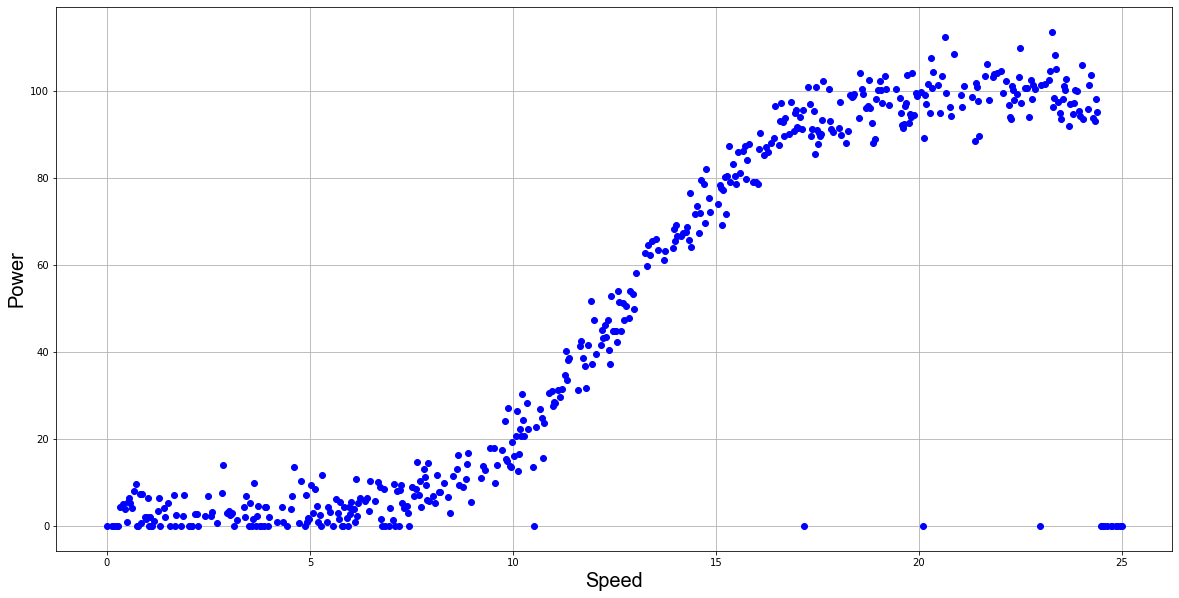

In [5]:
# plotting the graph

# size and font for labels
axis_font = {'fontname':'Arial', 'size':'20'}
# size of the graph
plt.figure(figsize=(20,10))
# plots the graph
plt.plot(powerProductionDataSet['speed'], powerProductionDataSet['power'], 'bo',label='actual')
# adding a grid and labels to x and y axis
plt.grid(True)
plt.xlabel("Speed", **axis_font)
plt.ylabel("Power", **axis_font)

In [6]:
# create a neural network with one neuron.
model = kr.models.Sequential()
# adding layers
model.add(kr.layers.Dense(64, activation='sigmoid'))


model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')


In [7]:
# fitting the data
model.fit(powerProductionDataSet['speed'], powerProductionDataSet['power'], epochs=30000, batch_size=5000)

Epoch 1/30000

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1/1 [==============================] - 0s 2ms/step - loss: 3898.1458
Epoch 2/30000
1/1 [==============================] - 0s 1ms/step - loss: 3889.7510
Epoch 3/30000
1/1 [==============================] - 0s 994us/step - loss: 3881.3943
Epoch 4/30000
1/1 [==============================] - 0s 3ms/step - loss: 3873.0784
Epoch 5/30000
1/1 [==============================] - 0s 2ms/step - loss: 3864.8049
Epoch 6/30000
1/1 [==============================] - 0s 3ms/step - loss: 3856.5757
Epoch 7/

1/1 [==============================] - 0s 3ms/step - loss: 3351.3931
Epoch 91/30000
1/1 [==============================] - 0s 4ms/step - loss: 3347.2981
Epoch 92/30000
1/1 [==============================] - 0s 3ms/step - loss: 3343.2324
Epoch 93/30000
1/1 [==============================] - 0s 3ms/step - loss: 3339.1946
Epoch 94/30000
1/1 [==============================] - 0s 5ms/step - loss: 3335.1851
Epoch 95/30000
1/1 [==============================] - 0s 3ms/step - loss: 3331.2029
Epoch 96/30000
1/1 [==============================] - 0s 3ms/step - loss: 3327.2483
Epoch 97/30000
1/1 [==============================] - 0s 3ms/step - loss: 3323.3206
Epoch 98/30000
1/1 [==============================] - 0s 2ms/step - loss: 3319.4194
Epoch 99/30000
1/1 [==============================] - 0s 3ms/step - loss: 3315.5447
Epoch 100/30000
1/1 [==============================] - 0s 6ms/step - loss: 3311.6963
Epoch 101/30000
1/1 [==============================] - 0s 2ms/step - loss: 3307.8730
Epoch

1/1 [==============================] - 0s 3ms/step - loss: 2806.9163
Epoch 282/30000
1/1 [==============================] - 0s 1ms/step - loss: 2804.7195
Epoch 283/30000
1/1 [==============================] - 0s 2ms/step - loss: 2802.5266
Epoch 284/30000
1/1 [==============================] - 0s 999us/step - loss: 2800.3376
Epoch 285/30000
1/1 [==============================] - 0s 2ms/step - loss: 2798.1531
Epoch 286/30000
1/1 [==============================] - 0s 1ms/step - loss: 2795.9724
Epoch 287/30000
1/1 [==============================] - 0s 2ms/step - loss: 2793.7957
Epoch 288/30000
1/1 [==============================] - 0s 2ms/step - loss: 2791.6230
Epoch 289/30000
1/1 [==============================] - 0s 2ms/step - loss: 2789.4548
Epoch 290/30000
1/1 [==============================] - 0s 2ms/step - loss: 2787.2903
Epoch 291/30000
1/1 [==============================] - 0s 955us/step - loss: 2785.1294
Epoch 292/30000
1/1 [==============================] - 0s 2ms/step - loss: 27

1/1 [==============================] - 0s 2ms/step - loss: 2613.0544
Epoch 378/30000
1/1 [==============================] - 0s 2ms/step - loss: 2611.2017
Epoch 379/30000
1/1 [==============================] - 0s 1ms/step - loss: 2609.3521
Epoch 380/30000
1/1 [==============================] - 0s 4ms/step - loss: 2607.5056
Epoch 381/30000
1/1 [==============================] - 0s 2ms/step - loss: 2605.6621
Epoch 382/30000
1/1 [==============================] - 0s 2ms/step - loss: 2603.8218
Epoch 383/30000
1/1 [==============================] - 0s 2ms/step - loss: 2601.9846
Epoch 384/30000
1/1 [==============================] - 0s 3ms/step - loss: 2600.1504
Epoch 385/30000
1/1 [==============================] - 0s 3ms/step - loss: 2598.3196
Epoch 386/30000
1/1 [==============================] - 0s 675us/step - loss: 2596.4917
Epoch 387/30000
1/1 [==============================] - 0s 2ms/step - loss: 2594.6672
Epoch 388/30000
1/1 [==============================] - 0s 3ms/step - loss: 2592

1/1 [==============================] - 0s 1ms/step - loss: 2303.9380
Epoch 570/30000
1/1 [==============================] - 0s 3ms/step - loss: 2302.4241
Epoch 571/30000
1/1 [==============================] - 0s 1ms/step - loss: 2300.9072
Epoch 572/30000
1/1 [==============================] - 0s 4ms/step - loss: 2299.3879
Epoch 573/30000
1/1 [==============================] - 0s 2ms/step - loss: 2297.8660
Epoch 574/30000
1/1 [==============================] - 0s 2ms/step - loss: 2296.3418
Epoch 575/30000
1/1 [==============================] - 0s 2ms/step - loss: 2294.8147
Epoch 576/30000
1/1 [==============================] - 0s 880us/step - loss: 2293.2849
Epoch 577/30000
1/1 [==============================] - 0s 2ms/step - loss: 2291.7524
Epoch 578/30000
1/1 [==============================] - 0s 3ms/step - loss: 2290.2170
Epoch 579/30000
1/1 [==============================] - 0s 2ms/step - loss: 2288.6785
Epoch 580/30000
1/1 [==============================] - 0s 2ms/step - loss: 2287

Epoch 665/30000
1/1 [==============================] - 0s 2ms/step - loss: 2139.6636
Epoch 666/30000
1/1 [==============================] - 0s 2ms/step - loss: 2137.7234
Epoch 667/30000
1/1 [==============================] - 0s 3ms/step - loss: 2135.7769
Epoch 668/30000
1/1 [==============================] - 0s 2ms/step - loss: 2133.8237
Epoch 669/30000
1/1 [==============================] - 0s 2ms/step - loss: 2131.8645
Epoch 670/30000
1/1 [==============================] - 0s 999us/step - loss: 2129.8984
Epoch 671/30000
1/1 [==============================] - 0s 1ms/step - loss: 2127.9250
Epoch 672/30000
1/1 [==============================] - 0s 2ms/step - loss: 2125.9451
Epoch 673/30000
1/1 [==============================] - 0s 2ms/step - loss: 2123.9568
Epoch 674/30000
1/1 [==============================] - 0s 1ms/step - loss: 2121.9612
Epoch 675/30000
1/1 [==============================] - 0s 2ms/step - loss: 2119.9580
Epoch 676/30000
1/1 [==============================] - 0s 2ms/s

1/1 [==============================] - 0s 2ms/step - loss: 1932.0735
Epoch 762/30000
1/1 [==============================] - 0s 2ms/step - loss: 1929.8999
Epoch 763/30000
1/1 [==============================] - 0s 2ms/step - loss: 1927.7300
Epoch 764/30000
1/1 [==============================] - 0s 2ms/step - loss: 1925.5636
Epoch 765/30000
1/1 [==============================] - 0s 1ms/step - loss: 1923.4006
Epoch 766/30000
1/1 [==============================] - 0s 2ms/step - loss: 1921.2411
Epoch 767/30000
1/1 [==============================] - 0s 2ms/step - loss: 1919.0847
Epoch 768/30000
1/1 [==============================] - 0s 2ms/step - loss: 1916.9314
Epoch 769/30000
1/1 [==============================] - 0s 2ms/step - loss: 1914.7812
Epoch 770/30000
1/1 [==============================] - 0s 2ms/step - loss: 1912.6339
Epoch 771/30000
1/1 [==============================] - 0s 999us/step - loss: 1910.4893
Epoch 772/30000
1/1 [==============================] - 0s 1ms/step - loss: 1908

1/1 [==============================] - 0s 4ms/step - loss: 1736.1202
Epoch 858/30000
1/1 [==============================] - 0s 1ms/step - loss: 1734.2421
Epoch 859/30000
1/1 [==============================] - 0s 2ms/step - loss: 1732.3676
Epoch 860/30000
1/1 [==============================] - 0s 2ms/step - loss: 1730.4960
Epoch 861/30000
1/1 [==============================] - 0s 2ms/step - loss: 1728.6281
Epoch 862/30000
1/1 [==============================] - 0s 4ms/step - loss: 1726.7628
Epoch 863/30000
1/1 [==============================] - 0s 1ms/step - loss: 1724.9012
Epoch 864/30000
1/1 [==============================] - 0s 2ms/step - loss: 1723.0426
Epoch 865/30000
1/1 [==============================] - 0s 2ms/step - loss: 1721.1871
Epoch 866/30000
1/1 [==============================] - 0s 2ms/step - loss: 1719.3347
Epoch 867/30000
1/1 [==============================] - 0s 3ms/step - loss: 1717.4855
Epoch 868/30000
1/1 [==============================] - 0s 2ms/step - loss: 1715.6

1/1 [==============================] - 0s 1ms/step - loss: 1421.5740
Epoch 1049/30000
1/1 [==============================] - 0s 3ms/step - loss: 1420.1210
Epoch 1050/30000
1/1 [==============================] - 0s 2ms/step - loss: 1418.6697
Epoch 1051/30000
1/1 [==============================] - 0s 3ms/step - loss: 1417.2198
Epoch 1052/30000
1/1 [==============================] - 0s 998us/step - loss: 1415.7720
Epoch 1053/30000
1/1 [==============================] - 0s 2ms/step - loss: 1414.3260
Epoch 1054/30000
1/1 [==============================] - 0s 2ms/step - loss: 1412.8816
Epoch 1055/30000
1/1 [==============================] - 0s 3ms/step - loss: 1411.4388
Epoch 1056/30000
1/1 [==============================] - 0s 2ms/step - loss: 1409.9978
Epoch 1057/30000
1/1 [==============================] - 0s 2ms/step - loss: 1408.5585
Epoch 1058/30000
1/1 [==============================] - 0s 2ms/step - loss: 1407.1208
Epoch 1059/30000
1/1 [==============================] - 0s 3ms/step -

1/1 [==============================] - 0s 1ms/step - loss: 1173.5178
Epoch 1239/30000
1/1 [==============================] - 0s 3ms/step - loss: 1172.3470
Epoch 1240/30000
1/1 [==============================] - 0s 3ms/step - loss: 1171.1772
Epoch 1241/30000
1/1 [==============================] - 0s 2ms/step - loss: 1170.0088
Epoch 1242/30000
1/1 [==============================] - 0s 2ms/step - loss: 1168.8417
Epoch 1243/30000
1/1 [==============================] - 0s 3ms/step - loss: 1167.6759
Epoch 1244/30000
1/1 [==============================] - 0s 2ms/step - loss: 1166.5114
Epoch 1245/30000
1/1 [==============================] - 0s 2ms/step - loss: 1165.3481
Epoch 1246/30000
1/1 [==============================] - 0s 3ms/step - loss: 1164.1860
Epoch 1247/30000
1/1 [==============================] - 0s 3ms/step - loss: 1163.0253
Epoch 1248/30000
1/1 [==============================] - 0s 2ms/step - loss: 1161.8657
Epoch 1249/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 973.2788
Epoch 1428/30000
1/1 [==============================] - 0s 2ms/step - loss: 972.3178
Epoch 1429/30000
1/1 [==============================] - 0s 2ms/step - loss: 971.3566
Epoch 1430/30000
1/1 [==============================] - 0s 2ms/step - loss: 970.3952
Epoch 1431/30000
1/1 [==============================] - 0s 2ms/step - loss: 969.4332
Epoch 1432/30000
1/1 [==============================] - 0s 1ms/step - loss: 968.4705
Epoch 1433/30000
1/1 [==============================] - 0s 3ms/step - loss: 967.5067
Epoch 1434/30000
1/1 [==============================] - 0s 2ms/step - loss: 966.5414
Epoch 1435/30000
1/1 [==============================] - 0s 2ms/step - loss: 965.5742
Epoch 1436/30000
1/1 [==============================] - 0s 2ms/step - loss: 964.6042
Epoch 1437/30000
1/1 [==============================] - 0s 3ms/step - loss: 963.6309
Epoch 1438/30000
1/1 [==============================] - 0s 1ms/step - loss: 962.65

1/1 [==============================] - 0s 2ms/step - loss: 789.2855
Epoch 1620/30000
1/1 [==============================] - 0s 4ms/step - loss: 788.4805
Epoch 1621/30000
1/1 [==============================] - 0s 2ms/step - loss: 787.6769
Epoch 1622/30000
1/1 [==============================] - 0s 2ms/step - loss: 786.8745
Epoch 1623/30000
1/1 [==============================] - 0s 1ms/step - loss: 786.0731
Epoch 1624/30000
1/1 [==============================] - 0s 4ms/step - loss: 785.2729
Epoch 1625/30000
1/1 [==============================] - 0s 3ms/step - loss: 784.4739
Epoch 1626/30000
1/1 [==============================] - 0s 1ms/step - loss: 783.6761
Epoch 1627/30000
1/1 [==============================] - 0s 2ms/step - loss: 782.8795
Epoch 1628/30000
1/1 [==============================] - 0s 3ms/step - loss: 782.0840
Epoch 1629/30000
1/1 [==============================] - 0s 2ms/step - loss: 781.2899
Epoch 1630/30000
1/1 [==============================] - 0s 2ms/step - loss: 780.49

1/1 [==============================] - 0s 2ms/step - loss: 646.7128
Epoch 1812/30000
1/1 [==============================] - 0s 2ms/step - loss: 645.9804
Epoch 1813/30000
1/1 [==============================] - 0s 2ms/step - loss: 645.2506
Epoch 1814/30000
1/1 [==============================] - 0s 2ms/step - loss: 644.5234
Epoch 1815/30000
1/1 [==============================] - 0s 2ms/step - loss: 643.7987
Epoch 1816/30000
1/1 [==============================] - 0s 999us/step - loss: 643.0764
Epoch 1817/30000
1/1 [==============================] - 0s 2ms/step - loss: 642.3566
Epoch 1818/30000
1/1 [==============================] - 0s 2ms/step - loss: 641.6390
Epoch 1819/30000
1/1 [==============================] - 0s 3ms/step - loss: 640.9240
Epoch 1820/30000
1/1 [==============================] - 0s 2ms/step - loss: 640.2112
Epoch 1821/30000
1/1 [==============================] - 0s 2ms/step - loss: 639.5007
Epoch 1822/30000
1/1 [==============================] - 0s 3ms/step - loss: 638.

1/1 [==============================] - 0s 2ms/step - loss: 533.0856
Epoch 2004/30000
1/1 [==============================] - 0s 2ms/step - loss: 532.5922
Epoch 2005/30000
1/1 [==============================] - 0s 2ms/step - loss: 532.0995
Epoch 2006/30000
1/1 [==============================] - 0s 2ms/step - loss: 531.6077
Epoch 2007/30000
1/1 [==============================] - 0s 2ms/step - loss: 531.1166
Epoch 2008/30000
1/1 [==============================] - 0s 2ms/step - loss: 530.6265
Epoch 2009/30000
1/1 [==============================] - 0s 2ms/step - loss: 530.1370
Epoch 2010/30000
1/1 [==============================] - 0s 2ms/step - loss: 529.6483
Epoch 2011/30000
1/1 [==============================] - 0s 1ms/step - loss: 529.1605
Epoch 2012/30000
1/1 [==============================] - 0s 2ms/step - loss: 528.6734
Epoch 2013/30000
1/1 [==============================] - 0s 2ms/step - loss: 528.1871
Epoch 2014/30000
1/1 [==============================] - 0s 1ms/step - loss: 527.70

1/1 [==============================] - 0s 2ms/step - loss: 451.4196
Epoch 2196/30000
1/1 [==============================] - 0s 2ms/step - loss: 451.0557
Epoch 2197/30000
1/1 [==============================] - 0s 1ms/step - loss: 450.6922
Epoch 2198/30000
1/1 [==============================] - 0s 2ms/step - loss: 450.3293
Epoch 2199/30000
1/1 [==============================] - 0s 2ms/step - loss: 449.9671
Epoch 2200/30000
1/1 [==============================] - 0s 2ms/step - loss: 449.6053
Epoch 2201/30000
1/1 [==============================] - 0s 3ms/step - loss: 449.2442
Epoch 2202/30000
1/1 [==============================] - 0s 2ms/step - loss: 448.8837
Epoch 2203/30000
1/1 [==============================] - 0s 3ms/step - loss: 448.5235
Epoch 2204/30000
1/1 [==============================] - 0s 1ms/step - loss: 448.1641
Epoch 2205/30000
1/1 [==============================] - 0s 2ms/step - loss: 447.8052
Epoch 2206/30000
1/1 [==============================] - 0s 997us/step - loss: 447.

1/1 [==============================] - 0s 998us/step - loss: 391.0574
Epoch 2388/30000
1/1 [==============================] - 0s 1ms/step - loss: 390.7886
Epoch 2389/30000
1/1 [==============================] - 0s 999us/step - loss: 390.5203
Epoch 2390/30000
1/1 [==============================] - 0s 996us/step - loss: 390.2523
Epoch 2391/30000
1/1 [==============================] - 0s 1ms/step - loss: 389.9849
Epoch 2392/30000
1/1 [==============================] - 0s 2ms/step - loss: 389.7177
Epoch 2393/30000
1/1 [==============================] - 0s 927us/step - loss: 389.4511
Epoch 2394/30000
1/1 [==============================] - 0s 941us/step - loss: 389.1848
Epoch 2395/30000
1/1 [==============================] - 0s 999us/step - loss: 388.9191
Epoch 2396/30000
1/1 [==============================] - 0s 3ms/step - loss: 388.6536
Epoch 2397/30000
1/1 [==============================] - 0s 932us/step - loss: 388.3887
Epoch 2398/30000
1/1 [==============================] - 0s 3ms/step 

1/1 [==============================] - 0s 1ms/step - loss: 346.6436
Epoch 2580/30000
1/1 [==============================] - 0s 2ms/step - loss: 346.4472
Epoch 2581/30000
1/1 [==============================] - 0s 3ms/step - loss: 346.2511
Epoch 2582/30000
1/1 [==============================] - 0s 2ms/step - loss: 346.0555
Epoch 2583/30000
1/1 [==============================] - 0s 2ms/step - loss: 345.8600
Epoch 2584/30000
1/1 [==============================] - 0s 3ms/step - loss: 345.6650
Epoch 2585/30000
1/1 [==============================] - 0s 2ms/step - loss: 345.4702
Epoch 2586/30000
1/1 [==============================] - 0s 1ms/step - loss: 345.2758
Epoch 2587/30000
1/1 [==============================] - 0s 2ms/step - loss: 345.0818
Epoch 2588/30000
1/1 [==============================] - 0s 2ms/step - loss: 344.8880
Epoch 2589/30000
1/1 [==============================] - 0s 2ms/step - loss: 344.6946
Epoch 2590/30000
1/1 [==============================] - 0s 2ms/step - loss: 344.50

1/1 [==============================] - 0s 2ms/step - loss: 314.5459
Epoch 2772/30000
1/1 [==============================] - 0s 2ms/step - loss: 314.4055
Epoch 2773/30000
1/1 [==============================] - 0s 2ms/step - loss: 314.2656
Epoch 2774/30000
1/1 [==============================] - 0s 2ms/step - loss: 314.1257
Epoch 2775/30000
1/1 [==============================] - 0s 816us/step - loss: 313.9862
Epoch 2776/30000
1/1 [==============================] - 0s 999us/step - loss: 313.8469
Epoch 2777/30000
1/1 [==============================] - 0s 2ms/step - loss: 313.7079
Epoch 2778/30000
1/1 [==============================] - 0s 2ms/step - loss: 313.5691
Epoch 2779/30000
1/1 [==============================] - 0s 3ms/step - loss: 313.4306
Epoch 2780/30000
1/1 [==============================] - 0s 3ms/step - loss: 313.2923
Epoch 2781/30000
1/1 [==============================] - 0s 3ms/step - loss: 313.1543
Epoch 2782/30000
1/1 [==============================] - 0s 1ms/step - loss: 31

1/1 [==============================] - 0s 2ms/step - loss: 291.8176
Epoch 2964/30000
1/1 [==============================] - 0s 2ms/step - loss: 291.7193
Epoch 2965/30000
1/1 [==============================] - 0s 2ms/step - loss: 291.6212
Epoch 2966/30000
1/1 [==============================] - 0s 2ms/step - loss: 291.5232
Epoch 2967/30000
1/1 [==============================] - 0s 2ms/step - loss: 291.4254
Epoch 2968/30000
1/1 [==============================] - 0s 1ms/step - loss: 291.3279
Epoch 2969/30000
1/1 [==============================] - 0s 2ms/step - loss: 291.2304
Epoch 2970/30000
1/1 [==============================] - 0s 1ms/step - loss: 291.1332
Epoch 2971/30000
1/1 [==============================] - 0s 2ms/step - loss: 291.0362
Epoch 2972/30000
1/1 [==============================] - 0s 2ms/step - loss: 290.9393
Epoch 2973/30000
1/1 [==============================] - 0s 4ms/step - loss: 290.8427
Epoch 2974/30000
1/1 [==============================] - 0s 2ms/step - loss: 290.74

1/1 [==============================] - 0s 2ms/step - loss: 276.0433
Epoch 3156/30000
1/1 [==============================] - 0s 1ms/step - loss: 275.9758
Epoch 3157/30000
1/1 [==============================] - 0s 2ms/step - loss: 275.9085
Epoch 3158/30000
1/1 [==============================] - 0s 1ms/step - loss: 275.8414
Epoch 3159/30000
1/1 [==============================] - 0s 2ms/step - loss: 275.7744
Epoch 3160/30000
1/1 [==============================] - 0s 2ms/step - loss: 275.7075
Epoch 3161/30000
1/1 [==============================] - 0s 3ms/step - loss: 275.6407
Epoch 3162/30000
1/1 [==============================] - 0s 2ms/step - loss: 275.5741
Epoch 3163/30000
1/1 [==============================] - 0s 3ms/step - loss: 275.5076
Epoch 3164/30000
1/1 [==============================] - 0s 2ms/step - loss: 275.4413
Epoch 3165/30000
1/1 [==============================] - 0s 2ms/step - loss: 275.3751
Epoch 3166/30000
1/1 [==============================] - 0s 2ms/step - loss: 275.30

1/1 [==============================] - 0s 1ms/step - loss: 270.1614
Epoch 3252/30000
1/1 [==============================] - 0s 1ms/step - loss: 270.1063
Epoch 3253/30000
1/1 [==============================] - 0s 2ms/step - loss: 270.0511
Epoch 3254/30000
1/1 [==============================] - 0s 2ms/step - loss: 269.9959
Epoch 3255/30000
1/1 [==============================] - 0s 1ms/step - loss: 269.9408
Epoch 3256/30000
1/1 [==============================] - 0s 2ms/step - loss: 269.8859
Epoch 3257/30000
1/1 [==============================] - 0s 4ms/step - loss: 269.8312
Epoch 3258/30000
1/1 [==============================] - 0s 2ms/step - loss: 269.7768
Epoch 3259/30000
1/1 [==============================] - 0s 1ms/step - loss: 269.7223
Epoch 3260/30000
1/1 [==============================] - 0s 916us/step - loss: 269.6678
Epoch 3261/30000
1/1 [==============================] - 0s 3ms/step - loss: 269.6135
Epoch 3262/30000
1/1 [==============================] - 0s 1ms/step - loss: 269.

1/1 [==============================] - 0s 1ms/step - loss: 265.3532
Epoch 3348/30000
1/1 [==============================] - 0s 1ms/step - loss: 265.3082
Epoch 3349/30000
1/1 [==============================] - 0s 2ms/step - loss: 265.2632
Epoch 3350/30000
1/1 [==============================] - 0s 999us/step - loss: 265.2183
Epoch 3351/30000
1/1 [==============================] - 0s 930us/step - loss: 265.1736
Epoch 3352/30000
1/1 [==============================] - 0s 2ms/step - loss: 265.1290
Epoch 3353/30000
1/1 [==============================] - 0s 2ms/step - loss: 265.0844
Epoch 3354/30000
1/1 [==============================] - 0s 2ms/step - loss: 265.0399
Epoch 3355/30000
1/1 [==============================] - 0s 2ms/step - loss: 264.9956
Epoch 3356/30000
1/1 [==============================] - 0s 942us/step - loss: 264.9513
Epoch 3357/30000
1/1 [==============================] - 0s 4ms/step - loss: 264.9072
Epoch 3358/30000
1/1 [==============================] - 0s 1ms/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 261.4524
Epoch 3444/30000
1/1 [==============================] - 0s 3ms/step - loss: 261.4161
Epoch 3445/30000
1/1 [==============================] - 0s 3ms/step - loss: 261.3797
Epoch 3446/30000
1/1 [==============================] - 0s 1ms/step - loss: 261.3435
Epoch 3447/30000
1/1 [==============================] - 0s 2ms/step - loss: 261.3073
Epoch 3448/30000
1/1 [==============================] - 0s 2ms/step - loss: 261.2712
Epoch 3449/30000
1/1 [==============================] - 0s 3ms/step - loss: 261.2353
Epoch 3450/30000
1/1 [==============================] - 0s 3ms/step - loss: 261.1994
Epoch 3451/30000
1/1 [==============================] - 0s 3ms/step - loss: 261.1636
Epoch 3452/30000
1/1 [==============================] - 0s 2ms/step - loss: 261.1278
Epoch 3453/30000
1/1 [==============================] - 0s 2ms/step - loss: 261.0921
Epoch 3454/30000
1/1 [==============================] - 0s 998us/step - loss: 261.

1/1 [==============================] - 0s 2ms/step - loss: 255.8101
Epoch 3636/30000
1/1 [==============================] - 0s 911us/step - loss: 255.7869
Epoch 3637/30000
1/1 [==============================] - 0s 2ms/step - loss: 255.7639
Epoch 3638/30000
1/1 [==============================] - 0s 2ms/step - loss: 255.7410
Epoch 3639/30000
1/1 [==============================] - 0s 1ms/step - loss: 255.7181
Epoch 3640/30000
1/1 [==============================] - 0s 2ms/step - loss: 255.6952
Epoch 3641/30000
1/1 [==============================] - 0s 3ms/step - loss: 255.6723
Epoch 3642/30000
1/1 [==============================] - 0s 2ms/step - loss: 255.6496
Epoch 3643/30000
1/1 [==============================] - 0s 2ms/step - loss: 255.6269
Epoch 3644/30000
1/1 [==============================] - 0s 2ms/step - loss: 255.6043
Epoch 3645/30000
1/1 [==============================] - 0s 2ms/step - loss: 255.5818
Epoch 3646/30000
1/1 [==============================] - 0s 4ms/step - loss: 255.

1/1 [==============================] - 0s 3ms/step - loss: 252.3135
Epoch 3828/30000
1/1 [==============================] - 0s 2ms/step - loss: 252.2996
Epoch 3829/30000
1/1 [==============================] - 0s 999us/step - loss: 252.2854
Epoch 3830/30000
1/1 [==============================] - 0s 1ms/step - loss: 252.2711
Epoch 3831/30000
1/1 [==============================] - 0s 4ms/step - loss: 252.2571
Epoch 3832/30000
1/1 [==============================] - 0s 2ms/step - loss: 252.2434
Epoch 3833/30000
1/1 [==============================] - 0s 4ms/step - loss: 252.2299
Epoch 3834/30000
1/1 [==============================] - 0s 1ms/step - loss: 252.2162
Epoch 3835/30000
1/1 [==============================] - 0s 2ms/step - loss: 252.2024
Epoch 3836/30000
1/1 [==============================] - 0s 5ms/step - loss: 252.1885
Epoch 3837/30000
1/1 [==============================] - 0s 2ms/step - loss: 252.1747
Epoch 3838/30000
1/1 [==============================] - 0s 5ms/step - loss: 252.

1/1 [==============================] - 0s 2ms/step - loss: 250.2327
Epoch 4020/30000
1/1 [==============================] - 0s 2ms/step - loss: 250.2249
Epoch 4021/30000
1/1 [==============================] - 0s 2ms/step - loss: 250.2173
Epoch 4022/30000
1/1 [==============================] - 0s 2ms/step - loss: 250.2094
Epoch 4023/30000
1/1 [==============================] - 0s 2ms/step - loss: 250.2011
Epoch 4024/30000
1/1 [==============================] - 0s 2ms/step - loss: 250.1926
Epoch 4025/30000
1/1 [==============================] - 0s 2ms/step - loss: 250.1844
Epoch 4026/30000
1/1 [==============================] - 0s 2ms/step - loss: 250.1765
Epoch 4027/30000
1/1 [==============================] - 0s 2ms/step - loss: 250.1687
Epoch 4028/30000
1/1 [==============================] - 0s 2ms/step - loss: 250.1610
Epoch 4029/30000
1/1 [==============================] - 0s 995us/step - loss: 250.1530
Epoch 4030/30000
1/1 [==============================] - 0s 3ms/step - loss: 250.

1/1 [==============================] - 0s 2ms/step - loss: 249.0490
Epoch 4212/30000
1/1 [==============================] - 0s 2ms/step - loss: 249.0446
Epoch 4213/30000
1/1 [==============================] - 0s 2ms/step - loss: 249.0403
Epoch 4214/30000
1/1 [==============================] - 0s 2ms/step - loss: 249.0361
Epoch 4215/30000
1/1 [==============================] - 0s 999us/step - loss: 249.0320
Epoch 4216/30000
1/1 [==============================] - 0s 1ms/step - loss: 249.0281
Epoch 4217/30000
1/1 [==============================] - 0s 3ms/step - loss: 249.0242
Epoch 4218/30000
1/1 [==============================] - 0s 998us/step - loss: 249.0201
Epoch 4219/30000
1/1 [==============================] - 0s 2ms/step - loss: 249.0155
Epoch 4220/30000
1/1 [==============================] - 0s 4ms/step - loss: 249.0105
Epoch 4221/30000
1/1 [==============================] - 0s 998us/step - loss: 249.0052
Epoch 4222/30000
1/1 [==============================] - 0s 2ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 248.4107
Epoch 4404/30000
1/1 [==============================] - 0s 3ms/step - loss: 248.4084
Epoch 4405/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.4061
Epoch 4406/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.4037
Epoch 4407/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.4014
Epoch 4408/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.3991
Epoch 4409/30000
1/1 [==============================] - 0s 3ms/step - loss: 248.3968
Epoch 4410/30000
1/1 [==============================] - 0s 3ms/step - loss: 248.3945
Epoch 4411/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.3922
Epoch 4412/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.3899
Epoch 4413/30000
1/1 [==============================] - 0s 3ms/step - loss: 248.3876
Epoch 4414/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.38

1/1 [==============================] - 0s 2ms/step - loss: 248.0855
Epoch 4596/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.0844
Epoch 4597/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.0832
Epoch 4598/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.0821
Epoch 4599/30000
1/1 [==============================] - 0s 1ms/step - loss: 248.0809
Epoch 4600/30000
1/1 [==============================] - 0s 3ms/step - loss: 248.0798
Epoch 4601/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.0786
Epoch 4602/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.0775
Epoch 4603/30000
1/1 [==============================] - 0s 998us/step - loss: 248.0764
Epoch 4604/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.0752
Epoch 4605/30000
1/1 [==============================] - 0s 2ms/step - loss: 248.0741
Epoch 4606/30000
1/1 [==============================] - 0s 998us/step - loss: 24

1/1 [==============================] - 0s 2ms/step - loss: 247.9928
Epoch 4692/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.9925
Epoch 4693/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.9922
Epoch 4694/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.9920
Epoch 4695/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.9913
Epoch 4696/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.9901
Epoch 4697/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.9884
Epoch 4698/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.9866
Epoch 4699/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.9852
Epoch 4700/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.9846
Epoch 4701/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.9843
Epoch 4702/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.98

1/1 [==============================] - 0s 5ms/step - loss: 247.8810
Epoch 4884/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.8806
Epoch 4885/30000
1/1 [==============================] - 0s 5ms/step - loss: 247.8802
Epoch 4886/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.8798
Epoch 4887/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.8794
Epoch 4888/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.8790
Epoch 4889/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.8786
Epoch 4890/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.8783
Epoch 4891/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8779
Epoch 4892/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.8775
Epoch 4893/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8771
Epoch 4894/30000
1/1 [==============================] - 0s 5ms/step - loss: 247.87

1/1 [==============================] - 0s 941us/step - loss: 247.8262
Epoch 5076/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8261
Epoch 5077/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.8259
Epoch 5078/30000
1/1 [==============================] - 0s 942us/step - loss: 247.8257
Epoch 5079/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8255
Epoch 5080/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8253
Epoch 5081/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8250
Epoch 5082/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8249
Epoch 5083/30000
1/1 [==============================] - 0s 993us/step - loss: 247.8247
Epoch 5084/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8244
Epoch 5085/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8243
Epoch 5086/30000
1/1 [==============================] - 0s 1000us/step - los

1/1 [==============================] - 0s 2ms/step - loss: 247.8094
Epoch 5172/30000
1/1 [==============================] - 0s 984us/step - loss: 247.8092
Epoch 5173/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8090
Epoch 5174/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.8088
Epoch 5175/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8087
Epoch 5176/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8086
Epoch 5177/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8085
Epoch 5178/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8083
Epoch 5179/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8081
Epoch 5180/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8079
Epoch 5181/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.8078
Epoch 5182/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.

1/1 [==============================] - 0s 999us/step - loss: 247.7960
Epoch 5268/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7958
Epoch 5269/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7957
Epoch 5270/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.7956
Epoch 5271/30000
1/1 [==============================] - 0s 996us/step - loss: 247.7954
Epoch 5272/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.7953
Epoch 5273/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7952
Epoch 5274/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7951
Epoch 5275/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7950
Epoch 5276/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.7949
Epoch 5277/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7947
Epoch 5278/30000
1/1 [==============================] - 0s 2ms/step - loss: 24

1/1 [==============================] - 0s 2ms/step - loss: 247.7749
Epoch 5460/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7748
Epoch 5461/30000
1/1 [==============================] - 0s 909us/step - loss: 247.7747
Epoch 5462/30000
1/1 [==============================] - 0s 999us/step - loss: 247.7746
Epoch 5463/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7745
Epoch 5464/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.7744
Epoch 5465/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7743
Epoch 5466/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7742
Epoch 5467/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7741
Epoch 5468/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7740
Epoch 5469/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7739
Epoch 5470/30000
1/1 [==============================] - 0s 2ms/step - loss: 24

1/1 [==============================] - 0s 2ms/step - loss: 247.7561
Epoch 5652/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7560
Epoch 5653/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.7559
Epoch 5654/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7558
Epoch 5655/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7557
Epoch 5656/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7556
Epoch 5657/30000
1/1 [==============================] - 0s 1000us/step - loss: 247.7555
Epoch 5658/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7554
Epoch 5659/30000
1/1 [==============================] - 0s 999us/step - loss: 247.7553
Epoch 5660/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7552
Epoch 5661/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.7551
Epoch 5662/30000
1/1 [==============================] - 0s 998us/step - loss:

1/1 [==============================] - 0s 2ms/step - loss: 247.7389
Epoch 5843/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7388
Epoch 5844/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.7388
Epoch 5845/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.7387
Epoch 5846/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7386
Epoch 5847/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.7385
Epoch 5848/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7384
Epoch 5849/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.7383
Epoch 5850/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7382
Epoch 5851/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7382
Epoch 5852/30000
1/1 [==============================] - 0s 993us/step - loss: 247.7381
Epoch 5853/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.

1/1 [==============================] - 0s 993us/step - loss: 247.7226
Epoch 6035/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7225
Epoch 6036/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7224
Epoch 6037/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7224
Epoch 6038/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7223
Epoch 6039/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7222
Epoch 6040/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7223
Epoch 6041/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.7223
Epoch 6042/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7224
Epoch 6043/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7226
Epoch 6044/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7229
Epoch 6045/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.

Epoch 6226/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7054
Epoch 6227/30000
1/1 [==============================] - 0s 928us/step - loss: 247.7054
Epoch 6228/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7053
Epoch 6229/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.7052
Epoch 6230/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7051
Epoch 6231/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.7050
Epoch 6232/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7049
Epoch 6233/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7048
Epoch 6234/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7047
Epoch 6235/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7046
Epoch 6236/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.7045
Epoch 6237/30000
1/1 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 2ms/step - loss: 247.6884
Epoch 6419/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6883
Epoch 6420/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6882
Epoch 6421/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6881
Epoch 6422/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6880
Epoch 6423/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6880
Epoch 6424/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6879
Epoch 6425/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6878
Epoch 6426/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6877
Epoch 6427/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6876
Epoch 6428/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6875
Epoch 6429/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.68

1/1 [==============================] - 0s 2ms/step - loss: 247.6721
Epoch 6611/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6720
Epoch 6612/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6720
Epoch 6613/30000
1/1 [==============================] - 0s 998us/step - loss: 247.6719
Epoch 6614/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6718
Epoch 6615/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6717
Epoch 6616/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6716
Epoch 6617/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6715
Epoch 6618/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6714
Epoch 6619/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6714
Epoch 6620/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6713
Epoch 6621/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.

Epoch 6802/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6560
Epoch 6803/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6559
Epoch 6804/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6559
Epoch 6805/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6557
Epoch 6806/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6557
Epoch 6807/30000
1/1 [==============================] - 0s 995us/step - loss: 247.6556
Epoch 6808/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6555
Epoch 6809/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6554
Epoch 6810/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6553
Epoch 6811/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6553
Epoch 6812/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6552
Epoch 6813/30000
1/1 [==============================] - 0s 2ms/

Epoch 6993/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6402
Epoch 6994/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6402
Epoch 6995/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6401
Epoch 6996/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6400
Epoch 6997/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6399
Epoch 6998/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6399
Epoch 6999/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6398
Epoch 7000/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6397
Epoch 7001/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6397
Epoch 7002/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6397
Epoch 7003/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6397
Epoch 7004/30000
1/1 [==============================] - 0s 2ms/st

1/1 [==============================] - 0s 2ms/step - loss: 247.6326
Epoch 7090/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6325
Epoch 7091/30000
1/1 [==============================] - 0s 999us/step - loss: 247.6324
Epoch 7092/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6324
Epoch 7093/30000
1/1 [==============================] - 0s 997us/step - loss: 247.6323
Epoch 7094/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6322
Epoch 7095/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6322
Epoch 7096/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6320
Epoch 7097/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6320
Epoch 7098/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6319
Epoch 7099/30000
1/1 [==============================] - 0s 999us/step - loss: 247.6318
Epoch 7100/30000
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 998us/step - loss: 247.6251
Epoch 7186/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6250
Epoch 7187/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6249
Epoch 7188/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6249
Epoch 7189/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6248
Epoch 7190/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6247
Epoch 7191/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6246
Epoch 7192/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6245
Epoch 7193/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6245
Epoch 7194/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6244
Epoch 7195/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6243
Epoch 7196/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.

1/1 [==============================] - 0s 1000us/step - loss: 247.6183
Epoch 7282/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6179
Epoch 7283/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6176
Epoch 7284/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6175
Epoch 7285/30000
1/1 [==============================] - 0s 938us/step - loss: 247.6176
Epoch 7286/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6177
Epoch 7287/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6176
Epoch 7288/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6175
Epoch 7289/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6173
Epoch 7290/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.6171
Epoch 7291/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6170
Epoch 7292/30000
1/1 [==============================] - 0s 998us/step - loss:

1/1 [==============================] - 0s 1ms/step - loss: 247.6036
Epoch 7474/30000
1/1 [==============================] - 0s 471us/step - loss: 247.6036
Epoch 7475/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6037
Epoch 7476/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6039
Epoch 7477/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6042
Epoch 7478/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6045
Epoch 7479/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.6048
Epoch 7480/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6050
Epoch 7481/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6050
Epoch 7482/30000
1/1 [==============================] - 0s 976us/step - loss: 247.6046
Epoch 7483/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.6040
Epoch 7484/30000
1/1 [==============================] - 0s 2ms/step - loss: 24

1/1 [==============================] - 0s 2ms/step - loss: 247.5962
Epoch 7570/30000
1/1 [==============================] - 0s 997us/step - loss: 247.5961
Epoch 7571/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5959
Epoch 7572/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5959
Epoch 7573/30000
1/1 [==============================] - 0s 997us/step - loss: 247.5958
Epoch 7574/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5958
Epoch 7575/30000
1/1 [==============================] - 0s 999us/step - loss: 247.5957
Epoch 7576/30000
1/1 [==============================] - 0s 998us/step - loss: 247.5956
Epoch 7577/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5956
Epoch 7578/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5955
Epoch 7579/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.5954
Epoch 7580/30000
1/1 [==============================] - 0s 999us/step - lo

1/1 [==============================] - 0s 1ms/step - loss: 247.5820
Epoch 7761/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5820
Epoch 7762/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5819
Epoch 7763/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.5819
Epoch 7764/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5818
Epoch 7765/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5817
Epoch 7766/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5816
Epoch 7767/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.5816
Epoch 7768/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.5815
Epoch 7769/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.5814
Epoch 7770/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5813
Epoch 7771/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.58

1/1 [==============================] - 0s 3ms/step - loss: 247.5685
Epoch 7953/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.5684
Epoch 7954/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5683
Epoch 7955/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5683
Epoch 7956/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5682
Epoch 7957/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5681
Epoch 7958/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5680
Epoch 7959/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5680
Epoch 7960/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5679
Epoch 7961/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5678
Epoch 7962/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.5678
Epoch 7963/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.56

1/1 [==============================] - 0s 1ms/step - loss: 247.5542
Epoch 8145/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.5541
Epoch 8146/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5541
Epoch 8147/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5540
Epoch 8148/30000
1/1 [==============================] - 0s 995us/step - loss: 247.5539
Epoch 8149/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5538
Epoch 8150/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5538
Epoch 8151/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5537
Epoch 8152/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5536
Epoch 8153/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.5535
Epoch 8154/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.5534
Epoch 8155/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.

1/1 [==============================] - 0s 1ms/step - loss: 247.5381
Epoch 8337/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.5380
Epoch 8338/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5379
Epoch 8339/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5379
Epoch 8340/30000
1/1 [==============================] - 0s 5ms/step - loss: 247.5378
Epoch 8341/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5377
Epoch 8342/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5376
Epoch 8343/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5375
Epoch 8344/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.5374
Epoch 8345/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.5373
Epoch 8346/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5373
Epoch 8347/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.53

1/1 [==============================] - 0s 2ms/step - loss: 247.5214
Epoch 8529/30000
1/1 [==============================] - 0s 998us/step - loss: 247.5213
Epoch 8530/30000
1/1 [==============================] - 0s 998us/step - loss: 247.5212
Epoch 8531/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5211
Epoch 8532/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5210
Epoch 8533/30000
1/1 [==============================] - 0s 910us/step - loss: 247.5210
Epoch 8534/30000
1/1 [==============================] - 0s 881us/step - loss: 247.5209
Epoch 8535/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.5208
Epoch 8536/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.5207
Epoch 8537/30000
1/1 [==============================] - 0s 998us/step - loss: 247.5206
Epoch 8538/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5205
Epoch 8539/30000
1/1 [==============================] - 0s 1ms/step - lo

1/1 [==============================] - 0s 2ms/step - loss: 247.5031
Epoch 8720/30000
1/1 [==============================] - 0s 855us/step - loss: 247.5030
Epoch 8721/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5029
Epoch 8722/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5028
Epoch 8723/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5027
Epoch 8724/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5026
Epoch 8725/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5025
Epoch 8726/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5023
Epoch 8727/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.5022
Epoch 8728/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5021
Epoch 8729/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.5020
Epoch 8730/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.

1/1 [==============================] - 0s 1ms/step - loss: 247.4809
Epoch 8912/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4808
Epoch 8913/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.4807
Epoch 8914/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4806
Epoch 8915/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.4805
Epoch 8916/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4803
Epoch 8917/30000
1/1 [==============================] - 0s 885us/step - loss: 247.4802
Epoch 8918/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4801
Epoch 8919/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.4800
Epoch 8920/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4799
Epoch 8921/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.4798
Epoch 8922/30000
1/1 [==============================] - 0s 995us/step - loss: 24

1/1 [==============================] - 0s 2ms/step - loss: 247.4586
Epoch 9104/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4585
Epoch 9105/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4584
Epoch 9106/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.4583
Epoch 9107/30000
1/1 [==============================] - 0s 999us/step - loss: 247.4582
Epoch 9108/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4581
Epoch 9109/30000
1/1 [==============================] - 0s 999us/step - loss: 247.4579
Epoch 9110/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4578
Epoch 9111/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4577
Epoch 9112/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4576
Epoch 9113/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4575
Epoch 9114/30000
1/1 [==============================] - 0s 3ms/step - loss: 24

1/1 [==============================] - 0s 2ms/step - loss: 247.4351
Epoch 9296/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4349
Epoch 9297/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4348
Epoch 9298/30000
1/1 [==============================] - 0s 996us/step - loss: 247.4347
Epoch 9299/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4346
Epoch 9300/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.4344
Epoch 9301/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4343
Epoch 9302/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4342
Epoch 9303/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.4341
Epoch 9304/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4339
Epoch 9305/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.4338
Epoch 9306/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.

1/1 [==============================] - 0s 4ms/step - loss: 247.4070
Epoch 9488/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4068
Epoch 9489/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.4067
Epoch 9490/30000
1/1 [==============================] - 0s 996us/step - loss: 247.4065
Epoch 9491/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4063
Epoch 9492/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.4062
Epoch 9493/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.4060
Epoch 9494/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.4058
Epoch 9495/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.4057
Epoch 9496/30000
1/1 [==============================] - 0s 889us/step - loss: 247.4055
Epoch 9497/30000
1/1 [==============================] - 0s 935us/step - loss: 247.4054
Epoch 9498/30000
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 247.3763
Epoch 9680/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3761
Epoch 9681/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3755
Epoch 9682/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.3749
Epoch 9683/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.3743
Epoch 9684/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3739
Epoch 9685/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3737
Epoch 9686/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3737
Epoch 9687/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.3738
Epoch 9688/30000
1/1 [==============================] - 0s 997us/step - loss: 247.3738
Epoch 9689/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3736
Epoch 9690/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.

1/1 [==============================] - 0s 1ms/step - loss: 247.3470
Epoch 9872/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3468
Epoch 9873/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3467
Epoch 9874/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3466
Epoch 9875/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.3464
Epoch 9876/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3463
Epoch 9877/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3462
Epoch 9878/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3461
Epoch 9879/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3459
Epoch 9880/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.3458
Epoch 9881/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.3457
Epoch 9882/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.34

1/1 [==============================] - 0s 2ms/step - loss: 247.3224
Epoch 10063/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3223
Epoch 10064/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.3221
Epoch 10065/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.3220
Epoch 10066/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.3219
Epoch 10067/30000
1/1 [==============================] - 0s 998us/step - loss: 247.3218
Epoch 10068/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3216
Epoch 10069/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3215
Epoch 10070/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3214
Epoch 10071/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3212
Epoch 10072/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.3211
Epoch 10073/30000
1/1 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 2ms/step - loss: 247.2996
Epoch 10253/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2995
Epoch 10254/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2994
Epoch 10255/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2992
Epoch 10256/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2991
Epoch 10257/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2990
Epoch 10258/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2989
Epoch 10259/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.2988
Epoch 10260/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.2987
Epoch 10261/30000
1/1 [==============================] - 0s 995us/step - loss: 247.2986
Epoch 10262/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2984
Epoch 10263/30000
1/1 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 1ms/step - loss: 247.2784
Epoch 10442/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.2783
Epoch 10443/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2782
Epoch 10444/30000
1/1 [==============================] - 0s 999us/step - loss: 247.2781
Epoch 10445/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2780
Epoch 10446/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.2779
Epoch 10447/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2778
Epoch 10448/30000
1/1 [==============================] - 0s 998us/step - loss: 247.2777
Epoch 10449/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2776
Epoch 10450/30000
1/1 [==============================] - 0s 995us/step - loss: 247.2775
Epoch 10451/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2773
Epoch 10452/30000
1/1 [==============================] - 0s 1ms/st

1/1 [==============================] - 0s 2ms/step - loss: 247.2681
Epoch 10537/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2680
Epoch 10538/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2679
Epoch 10539/30000
1/1 [==============================] - 0s 997us/step - loss: 247.2678
Epoch 10540/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.2677
Epoch 10541/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2676
Epoch 10542/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2674
Epoch 10543/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2673
Epoch 10544/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2672
Epoch 10545/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2671
Epoch 10546/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.2670
Epoch 10547/30000
1/1 [==============================] - 0s 1ms/step -

1/1 [==============================] - 0s 2ms/step - loss: 247.2592
Epoch 10632/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2595
Epoch 10633/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2595
Epoch 10634/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.2590
Epoch 10635/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2582
Epoch 10636/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2573
Epoch 10637/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2567
Epoch 10638/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2565
Epoch 10639/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2568
Epoch 10640/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2570
Epoch 10641/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2570
Epoch 10642/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 247.2326
Epoch 10822/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.2324
Epoch 10823/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2323
Epoch 10824/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2321
Epoch 10825/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2320
Epoch 10826/30000
1/1 [==============================] - 0s 999us/step - loss: 247.2319
Epoch 10827/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2318
Epoch 10828/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2316
Epoch 10829/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2315
Epoch 10830/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2313
Epoch 10831/30000
1/1 [==============================] - 0s 999us/step - loss: 247.2311
Epoch 10832/30000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 247.2195
Epoch 10917/30000
1/1 [==============================] - 0s 998us/step - loss: 247.2193
Epoch 10918/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2192
Epoch 10919/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2191
Epoch 10920/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2190
Epoch 10921/30000
1/1 [==============================] - 0s 999us/step - loss: 247.2189
Epoch 10922/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2187
Epoch 10923/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.2185
Epoch 10924/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2184
Epoch 10925/30000
1/1 [==============================] - 0s 998us/step - loss: 247.2182
Epoch 10926/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2181
Epoch 10927/30000
1/1 [==============================] - 0s 996us/

1/1 [==============================] - 0s 2ms/step - loss: 247.2070
Epoch 11012/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2069
Epoch 11013/30000
1/1 [==============================] - 0s 997us/step - loss: 247.2068
Epoch 11014/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2066
Epoch 11015/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.2065
Epoch 11016/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.2064
Epoch 11017/30000
1/1 [==============================] - 0s 917us/step - loss: 247.2063
Epoch 11018/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2061
Epoch 11019/30000
1/1 [==============================] - 0s 7ms/step - loss: 247.2060
Epoch 11020/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.2059
Epoch 11021/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.2057
Epoch 11022/30000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 998us/step - loss: 247.1955
Epoch 11107/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1953
Epoch 11108/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1952
Epoch 11109/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1951
Epoch 11110/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1950
Epoch 11111/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1949
Epoch 11112/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1947
Epoch 11113/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.1947
Epoch 11114/30000
1/1 [==============================] - 0s 1000us/step - loss: 247.1945
Epoch 11115/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1944
Epoch 11116/30000
1/1 [==============================] - 0s 999us/step - loss: 247.1943
Epoch 11117/30000
1/1 [==============================] - 0s 2ms/s

1/1 [==============================] - 0s 2ms/step - loss: 247.1748
Epoch 11297/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1747
Epoch 11298/30000
1/1 [==============================] - 0s 1000us/step - loss: 247.1746
Epoch 11299/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.1745
Epoch 11300/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1744
Epoch 11301/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1743
Epoch 11302/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1742
Epoch 11303/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1741
Epoch 11304/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1740
Epoch 11305/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1739
Epoch 11306/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.1738
Epoch 11307/30000
1/1 [==============================] - 0s 2ms/step 

1/1 [==============================] - 0s 2ms/step - loss: 247.1550
Epoch 11487/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1549
Epoch 11488/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1548
Epoch 11489/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1546
Epoch 11490/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1545
Epoch 11491/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.1544
Epoch 11492/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1543
Epoch 11493/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1542
Epoch 11494/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.1541
Epoch 11495/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1540
Epoch 11496/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1539
Epoch 11497/30000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 247.1446
Epoch 11582/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1445
Epoch 11583/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1444
Epoch 11584/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1443
Epoch 11585/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1443
Epoch 11586/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1444
Epoch 11587/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1444
Epoch 11588/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1446
Epoch 11589/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1449
Epoch 11590/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1451
Epoch 11591/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1453
Epoch 11592/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.1341
Epoch 11677/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1340
Epoch 11678/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1339
Epoch 11679/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1338
Epoch 11680/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1337
Epoch 11681/30000
1/1 [==============================] - 0s 999us/step - loss: 247.1335
Epoch 11682/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1335
Epoch 11683/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.1333
Epoch 11684/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1332
Epoch 11685/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.1331
Epoch 11686/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1330
Epoch 11687/30000
1/1 [==============================] - 0s 1ms/step -

1/1 [==============================] - 0s 2ms/step - loss: 247.1236
Epoch 11772/30000
1/1 [==============================] - 0s 997us/step - loss: 247.1235
Epoch 11773/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1234
Epoch 11774/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1233
Epoch 11775/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1232
Epoch 11776/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1231
Epoch 11777/30000
1/1 [==============================] - 0s 988us/step - loss: 247.1230
Epoch 11778/30000
1/1 [==============================] - 0s 999us/step - loss: 247.1228
Epoch 11779/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1228
Epoch 11780/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1226
Epoch 11781/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1225
Epoch 11782/30000
1/1 [==============================] - 0s 2ms/st

1/1 [==============================] - 0s 2ms/step - loss: 247.1131
Epoch 11867/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.1131
Epoch 11868/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1129
Epoch 11869/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.1128
Epoch 11870/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1127
Epoch 11871/30000
1/1 [==============================] - 0s 998us/step - loss: 247.1126
Epoch 11872/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.1125
Epoch 11873/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1124
Epoch 11874/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.1123
Epoch 11875/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.1122
Epoch 11876/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.1120
Epoch 11877/30000
1/1 [==============================] - 0s 4ms/step -

1/1 [==============================] - 0s 2ms/step - loss: 247.0920
Epoch 12056/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0919
Epoch 12057/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.0918
Epoch 12058/30000
1/1 [==============================] - 0s 992us/step - loss: 247.0916
Epoch 12059/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.0915
Epoch 12060/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0914
Epoch 12061/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0913
Epoch 12062/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.0912
Epoch 12063/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0910
Epoch 12064/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0909
Epoch 12065/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0908
Epoch 12066/30000
1/1 [==============================] - 0s 999us/step

1/1 [==============================] - 0s 2ms/step - loss: 247.0806
Epoch 12151/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0802
Epoch 12152/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0802
Epoch 12153/30000
1/1 [==============================] - 0s 998us/step - loss: 247.0803
Epoch 12154/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0803
Epoch 12155/30000
1/1 [==============================] - 0s 999us/step - loss: 247.0801
Epoch 12156/30000
1/1 [==============================] - 0s 1000us/step - loss: 247.0799
Epoch 12157/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0796
Epoch 12158/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.0794
Epoch 12159/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0794
Epoch 12160/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0794
Epoch 12161/30000
1/1 [==============================] - 0s 3ms/s

1/1 [==============================] - 0s 2ms/step - loss: 247.0576
Epoch 12340/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0574
Epoch 12341/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0573
Epoch 12342/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0572
Epoch 12343/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.0571
Epoch 12344/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0569
Epoch 12345/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0568
Epoch 12346/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0567
Epoch 12347/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.0566
Epoch 12348/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0564
Epoch 12349/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0564
Epoch 12350/30000
1/1 [==============================] - 0s 2ms/step - l

Epoch 12434/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0458
Epoch 12435/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0457
Epoch 12436/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.0455
Epoch 12437/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0454
Epoch 12438/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0453
Epoch 12439/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0452
Epoch 12440/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0450
Epoch 12441/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0449
Epoch 12442/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0448
Epoch 12443/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.0447
Epoch 12444/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0445
Epoch 12445/30000
1/1 [==============================]

1/1 [==============================] - 0s 2ms/step - loss: 247.0210
Epoch 12624/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0209
Epoch 12625/30000
1/1 [==============================] - 0s 832us/step - loss: 247.0207
Epoch 12626/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.0206
Epoch 12627/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.0204
Epoch 12628/30000
1/1 [==============================] - 0s 995us/step - loss: 247.0203
Epoch 12629/30000
1/1 [==============================] - 0s 928us/step - loss: 247.0202
Epoch 12630/30000
1/1 [==============================] - 0s 3ms/step - loss: 247.0201
Epoch 12631/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0199
Epoch 12632/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0197
Epoch 12633/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0196
Epoch 12634/30000
1/1 [==============================] - 0s 2ms/st

1/1 [==============================] - 0s 3ms/step - loss: 247.0074
Epoch 12719/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0073
Epoch 12720/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.0072
Epoch 12721/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0070
Epoch 12722/30000
1/1 [==============================] - 0s 4ms/step - loss: 247.0068
Epoch 12723/30000
1/1 [==============================] - 0s 1ms/step - loss: 247.0067
Epoch 12724/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0065
Epoch 12725/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0063
Epoch 12726/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0062
Epoch 12727/30000
1/1 [==============================] - 0s 2ms/step - loss: 247.0061
Epoch 12728/30000
1/1 [==============================] - 0s 921us/step - loss: 247.0060
Epoch 12729/30000
1/1 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 2ms/step - loss: 246.9893
Epoch 12814/30000
1/1 [==============================] - 0s 2ms/step - loss: 246.9885
Epoch 12815/30000
1/1 [==============================] - 0s 2ms/step - loss: 246.9876
Epoch 12816/30000
1/1 [==============================] - 0s 999us/step - loss: 246.9863
Epoch 12817/30000
1/1 [==============================] - 0s 1ms/step - loss: 246.9844
Epoch 12818/30000
1/1 [==============================] - 0s 4ms/step - loss: 246.9818
Epoch 12819/30000
1/1 [==============================] - 0s 1000us/step - loss: 246.9783
Epoch 12820/30000
1/1 [==============================] - 0s 998us/step - loss: 246.9732
Epoch 12821/30000
1/1 [==============================] - 0s 1ms/step - loss: 246.9662
Epoch 12822/30000
1/1 [==============================] - 0s 2ms/step - loss: 246.9564
Epoch 12823/30000
1/1 [==============================] - 0s 997us/step - loss: 246.9428
Epoch 12824/30000
1/1 [==============================] - 0s 2ms

1/1 [==============================] - 0s 995us/step - loss: 240.9655
Epoch 13004/30000
1/1 [==============================] - 0s 2ms/step - loss: 240.9520
Epoch 13005/30000
1/1 [==============================] - 0s 996us/step - loss: 240.9386
Epoch 13006/30000
1/1 [==============================] - 0s 2ms/step - loss: 240.9252
Epoch 13007/30000
1/1 [==============================] - 0s 3ms/step - loss: 240.9118
Epoch 13008/30000
1/1 [==============================] - 0s 3ms/step - loss: 240.8985
Epoch 13009/30000
1/1 [==============================] - 0s 3ms/step - loss: 240.8851
Epoch 13010/30000
1/1 [==============================] - 0s 2ms/step - loss: 240.8718
Epoch 13011/30000
1/1 [==============================] - 0s 1ms/step - loss: 240.8585
Epoch 13012/30000
1/1 [==============================] - 0s 1ms/step - loss: 240.8453
Epoch 13013/30000
1/1 [==============================] - 0s 2ms/step - loss: 240.8320
Epoch 13014/30000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 238.9098
Epoch 13193/30000
1/1 [==============================] - 0s 998us/step - loss: 238.9008
Epoch 13194/30000
1/1 [==============================] - 0s 2ms/step - loss: 238.8918
Epoch 13195/30000
1/1 [==============================] - 0s 2ms/step - loss: 238.8828
Epoch 13196/30000
1/1 [==============================] - 0s 881us/step - loss: 238.8738
Epoch 13197/30000
1/1 [==============================] - 0s 2ms/step - loss: 238.8650
Epoch 13198/30000
1/1 [==============================] - 0s 2ms/step - loss: 238.8560
Epoch 13199/30000
1/1 [==============================] - 0s 2ms/step - loss: 238.8471
Epoch 13200/30000
1/1 [==============================] - 0s 2ms/step - loss: 238.8382
Epoch 13201/30000
1/1 [==============================] - 0s 1ms/step - loss: 238.8293
Epoch 13202/30000
1/1 [==============================] - 0s 2ms/step - loss: 238.8204
Epoch 13203/30000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 238.1047
Epoch 13288/30000
1/1 [==============================] - 0s 1ms/step - loss: 238.0966
Epoch 13289/30000
1/1 [==============================] - 0s 1ms/step - loss: 238.0886
Epoch 13290/30000
1/1 [==============================] - 0s 1ms/step - loss: 238.0806
Epoch 13291/30000
1/1 [==============================] - 0s 2ms/step - loss: 238.0726
Epoch 13292/30000
1/1 [==============================] - 0s 2ms/step - loss: 238.0646
Epoch 13293/30000
1/1 [==============================] - ETA: 0s - loss: 238.056 - 0s 2ms/step - loss: 238.0566
Epoch 13294/30000
1/1 [==============================] - 0s 2ms/step - loss: 238.0487
Epoch 13295/30000
1/1 [==============================] - 0s 3ms/step - loss: 238.0407
Epoch 13296/30000
1/1 [==============================] - 0s 1ms/step - loss: 238.0327
Epoch 13297/30000
1/1 [==============================] - 0s 2ms/step - loss: 238.0247
Epoch 13298/30000
1/1 [=======================

Epoch 13382/30000
1/1 [==============================] - 0s 2ms/step - loss: 237.3748
Epoch 13383/30000
1/1 [==============================] - 0s 3ms/step - loss: 237.3675
Epoch 13384/30000
1/1 [==============================] - 0s 4ms/step - loss: 237.3601
Epoch 13385/30000
1/1 [==============================] - 0s 1ms/step - loss: 237.3527
Epoch 13386/30000
1/1 [==============================] - 0s 3ms/step - loss: 237.3453
Epoch 13387/30000
1/1 [==============================] - 0s 2ms/step - loss: 237.3380
Epoch 13388/30000
1/1 [==============================] - 0s 2ms/step - loss: 237.3307
Epoch 13389/30000
1/1 [==============================] - 0s 3ms/step - loss: 237.3233
Epoch 13390/30000
1/1 [==============================] - 0s 3ms/step - loss: 237.3160
Epoch 13391/30000
1/1 [==============================] - 0s 2ms/step - loss: 237.3087
Epoch 13392/30000
1/1 [==============================] - 0s 2ms/step - loss: 237.3015
Epoch 13393/30000
1/1 [==============================]

1/1 [==============================] - 0s 2ms/step - loss: 236.0790
Epoch 13571/30000
1/1 [==============================] - 0s 3ms/step - loss: 236.0726
Epoch 13572/30000
1/1 [==============================] - 0s 3ms/step - loss: 236.0661
Epoch 13573/30000
1/1 [==============================] - 0s 3ms/step - loss: 236.0596
Epoch 13574/30000
1/1 [==============================] - 0s 1ms/step - loss: 236.0531
Epoch 13575/30000
1/1 [==============================] - 0s 2ms/step - loss: 236.0466
Epoch 13576/30000
1/1 [==============================] - 0s 2ms/step - loss: 236.0401
Epoch 13577/30000
1/1 [==============================] - 0s 2ms/step - loss: 236.0337
Epoch 13578/30000
1/1 [==============================] - 0s 2ms/step - loss: 236.0272
Epoch 13579/30000
1/1 [==============================] - 0s 3ms/step - loss: 236.0207
Epoch 13580/30000
1/1 [==============================] - 0s 2ms/step - loss: 236.0143
Epoch 13581/30000
1/1 [==============================] - 0s 2ms/step - l

Epoch 13665/30000
1/1 [==============================] - 0s 3ms/step - loss: 235.4777
Epoch 13666/30000
1/1 [==============================] - 0s 2ms/step - loss: 235.4714
Epoch 13667/30000
1/1 [==============================] - 0s 2ms/step - loss: 235.4652
Epoch 13668/30000
1/1 [==============================] - 0s 2ms/step - loss: 235.4590
Epoch 13669/30000
1/1 [==============================] - 0s 2ms/step - loss: 235.4530
Epoch 13670/30000
1/1 [==============================] - 0s 3ms/step - loss: 235.4468
Epoch 13671/30000
1/1 [==============================] - 0s 2ms/step - loss: 235.4406
Epoch 13672/30000
1/1 [==============================] - 0s 997us/step - loss: 235.4344
Epoch 13673/30000
1/1 [==============================] - 0s 3ms/step - loss: 235.4283
Epoch 13674/30000
1/1 [==============================] - 0s 1ms/step - loss: 235.4222
Epoch 13675/30000
1/1 [==============================] - 0s 3ms/step - loss: 235.4161
Epoch 13676/30000
1/1 [=============================

1/1 [==============================] - 0s 2ms/step - loss: 234.3517
Epoch 13855/30000
1/1 [==============================] - 0s 2ms/step - loss: 234.3472
Epoch 13856/30000
1/1 [==============================] - 0s 995us/step - loss: 234.3426
Epoch 13857/30000
1/1 [==============================] - 0s 2ms/step - loss: 234.3368
Epoch 13858/30000
1/1 [==============================] - 0s 998us/step - loss: 234.3297
Epoch 13859/30000
1/1 [==============================] - 0s 999us/step - loss: 234.3229
Epoch 13860/30000
1/1 [==============================] - 0s 2ms/step - loss: 234.3173
Epoch 13861/30000
1/1 [==============================] - 0s 2ms/step - loss: 234.3124
Epoch 13862/30000
1/1 [==============================] - 0s 2ms/step - loss: 234.3071
Epoch 13863/30000
1/1 [==============================] - 0s 2ms/step - loss: 234.3008
Epoch 13864/30000
1/1 [==============================] - 0s 2ms/step - loss: 234.2943
Epoch 13865/30000
1/1 [==============================] - 0s 3ms/st

Epoch 13949/30000
1/1 [==============================] - 0s 2ms/step - loss: 233.3944
Epoch 13950/30000
1/1 [==============================] - 0s 4ms/step - loss: 233.3758
Epoch 13951/30000
1/1 [==============================] - 0s 3ms/step - loss: 233.3573
Epoch 13952/30000
1/1 [==============================] - 0s 4ms/step - loss: 233.3386
Epoch 13953/30000
1/1 [==============================] - 0s 999us/step - loss: 233.3200
Epoch 13954/30000
1/1 [==============================] - 0s 999us/step - loss: 233.3012
Epoch 13955/30000
1/1 [==============================] - 0s 2ms/step - loss: 233.2822
Epoch 13956/30000
1/1 [==============================] - 0s 3ms/step - loss: 233.2632
Epoch 13957/30000
1/1 [==============================] - 0s 954us/step - loss: 233.2442
Epoch 13958/30000
1/1 [==============================] - 0s 998us/step - loss: 233.2252
Epoch 13959/30000
1/1 [==============================] - 0s 3ms/step - loss: 233.2064
Epoch 13960/30000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 230.3599
Epoch 14139/30000
1/1 [==============================] - 0s 4ms/step - loss: 230.3464
Epoch 14140/30000
1/1 [==============================] - 0s 2ms/step - loss: 230.3329
Epoch 14141/30000
1/1 [==============================] - 0s 4ms/step - loss: 230.3194
Epoch 14142/30000
1/1 [==============================] - 0s 4ms/step - loss: 230.3060
Epoch 14143/30000
1/1 [==============================] - 0s 2ms/step - loss: 230.2925
Epoch 14144/30000
1/1 [==============================] - 0s 4ms/step - loss: 230.2791
Epoch 14145/30000
1/1 [==============================] - 0s 4ms/step - loss: 230.2657
Epoch 14146/30000
1/1 [==============================] - 0s 3ms/step - loss: 230.2522
Epoch 14147/30000
1/1 [==============================] - 0s 2ms/step - loss: 230.2389
Epoch 14148/30000
1/1 [==============================] - 0s 3ms/step - loss: 230.2255
Epoch 14149/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 228.0233
Epoch 14329/30000
1/1 [==============================] - 0s 1ms/step - loss: 228.0119
Epoch 14330/30000
1/1 [==============================] - 0s 2ms/step - loss: 228.0005
Epoch 14331/30000
1/1 [==============================] - 0s 3ms/step - loss: 227.9890
Epoch 14332/30000
1/1 [==============================] - 0s 997us/step - loss: 227.9776
Epoch 14333/30000
1/1 [==============================] - 0s 2ms/step - loss: 227.9662
Epoch 14334/30000
1/1 [==============================] - 0s 1ms/step - loss: 227.9548
Epoch 14335/30000
1/1 [==============================] - 0s 4ms/step - loss: 227.9435
Epoch 14336/30000
1/1 [==============================] - 0s 2ms/step - loss: 227.9320
Epoch 14337/30000
1/1 [==============================] - 0s 1ms/step - loss: 227.9207
Epoch 14338/30000
1/1 [==============================] - 0s 2ms/step - loss: 227.9093
Epoch 14339/30000
1/1 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 4ms/step - loss: 226.9659
Epoch 14424/30000
1/1 [==============================] - 0s 1ms/step - loss: 226.9549
Epoch 14425/30000
1/1 [==============================] - 0s 1ms/step - loss: 226.9440
Epoch 14426/30000
1/1 [==============================] - 0s 2ms/step - loss: 226.9333
Epoch 14427/30000
1/1 [==============================] - 0s 3ms/step - loss: 226.9226
Epoch 14428/30000
1/1 [==============================] - 0s 998us/step - loss: 226.9117
Epoch 14429/30000
1/1 [==============================] - 0s 1ms/step - loss: 226.9009
Epoch 14430/30000
1/1 [==============================] - 0s 999us/step - loss: 226.8901
Epoch 14431/30000
1/1 [==============================] - 0s 2ms/step - loss: 226.8794
Epoch 14432/30000
1/1 [==============================] - 0s 1ms/step - loss: 226.8686
Epoch 14433/30000
1/1 [==============================] - 0s 3ms/step - loss: 226.8578
Epoch 14434/30000
1/1 [==============================] - 0s 996us/st

1/1 [==============================] - 0s 2ms/step - loss: 225.0047
Epoch 14613/30000
1/1 [==============================] - 0s 2ms/step - loss: 224.9948
Epoch 14614/30000
1/1 [==============================] - 0s 999us/step - loss: 224.9854
Epoch 14615/30000
1/1 [==============================] - 0s 1ms/step - loss: 224.9756
Epoch 14616/30000
1/1 [==============================] - 0s 3ms/step - loss: 224.9651
Epoch 14617/30000
1/1 [==============================] - 0s 3ms/step - loss: 224.9550
Epoch 14618/30000
1/1 [==============================] - 0s 2ms/step - loss: 224.9453
Epoch 14619/30000
1/1 [==============================] - 0s 2ms/step - loss: 224.9356
Epoch 14620/30000
1/1 [==============================] - 0s 2ms/step - loss: 224.9256
Epoch 14621/30000
1/1 [==============================] - 0s 996us/step - loss: 224.9154
Epoch 14622/30000
1/1 [==============================] - 0s 998us/step - loss: 224.9055
Epoch 14623/30000
1/1 [==============================] - 0s 999us/

1/1 [==============================] - 0s 3ms/step - loss: 224.0763
Epoch 14708/30000
1/1 [==============================] - 0s 1ms/step - loss: 224.0667
Epoch 14709/30000
1/1 [==============================] - 0s 1000us/step - loss: 224.0570
Epoch 14710/30000
1/1 [==============================] - 0s 4ms/step - loss: 224.0474
Epoch 14711/30000
1/1 [==============================] - 0s 996us/step - loss: 224.0378
Epoch 14712/30000
1/1 [==============================] - 0s 2ms/step - loss: 224.0282
Epoch 14713/30000
1/1 [==============================] - 0s 1ms/step - loss: 224.0186
Epoch 14714/30000
1/1 [==============================] - 0s 889us/step - loss: 224.0090
Epoch 14715/30000
1/1 [==============================] - 0s 3ms/step - loss: 223.9994
Epoch 14716/30000
1/1 [==============================] - 0s 2ms/step - loss: 223.9898
Epoch 14717/30000
1/1 [==============================] - 0s 2ms/step - loss: 223.9802
Epoch 14718/30000
1/1 [==============================] - 0s 2ms/s

1/1 [==============================] - 0s 1ms/step - loss: 223.1756
Epoch 14803/30000
1/1 [==============================] - 0s 2ms/step - loss: 223.1683
Epoch 14804/30000
1/1 [==============================] - 0s 2ms/step - loss: 223.1617
Epoch 14805/30000
1/1 [==============================] - 0s 2ms/step - loss: 223.1522
Epoch 14806/30000
1/1 [==============================] - 0s 2ms/step - loss: 223.1405
Epoch 14807/30000
1/1 [==============================] - 0s 1ms/step - loss: 223.1292
Epoch 14808/30000
1/1 [==============================] - 0s 999us/step - loss: 223.1204
Epoch 14809/30000
1/1 [==============================] - 0s 2ms/step - loss: 223.1129
Epoch 14810/30000
1/1 [==============================] - 0s 3ms/step - loss: 223.1039
Epoch 14811/30000
1/1 [==============================] - 0s 2ms/step - loss: 223.0934
Epoch 14812/30000
1/1 [==============================] - 0s 1ms/step - loss: 223.0828
Epoch 14813/30000
1/1 [==============================] - 0s 3ms/step -

1/1 [==============================] - 0s 1ms/step - loss: 222.3049
Epoch 14898/30000
1/1 [==============================] - 0s 2ms/step - loss: 222.2959
Epoch 14899/30000
1/1 [==============================] - 0s 1ms/step - loss: 222.2869
Epoch 14900/30000
1/1 [==============================] - ETA: 0s - loss: 222.277 - 0s 2ms/step - loss: 222.2778
Epoch 14901/30000
1/1 [==============================] - 0s 1ms/step - loss: 222.2688
Epoch 14902/30000
1/1 [==============================] - 0s 812us/step - loss: 222.2597
Epoch 14903/30000
1/1 [==============================] - 0s 2ms/step - loss: 222.2507
Epoch 14904/30000
1/1 [==============================] - 0s 3ms/step - loss: 222.2416
Epoch 14905/30000
1/1 [==============================] - 0s 1ms/step - loss: 222.2326
Epoch 14906/30000
1/1 [==============================] - 0s 1ms/step - loss: 222.2236
Epoch 14907/30000
1/1 [==============================] - 0s 2ms/step - loss: 222.2146
Epoch 14908/30000
1/1 [=====================

1/1 [==============================] - 0s 936us/step - loss: 221.0593
Epoch 14993/30000
1/1 [==============================] - 0s 1ms/step - loss: 221.0369
Epoch 14994/30000
1/1 [==============================] - 0s 1ms/step - loss: 221.0144
Epoch 14995/30000
1/1 [==============================] - 0s 2ms/step - loss: 220.9920
Epoch 14996/30000
1/1 [==============================] - 0s 1ms/step - loss: 220.9702
Epoch 14997/30000
1/1 [==============================] - 0s 3ms/step - loss: 220.9494
Epoch 14998/30000
1/1 [==============================] - 0s 1ms/step - loss: 220.9312
Epoch 14999/30000
1/1 [==============================] - 0s 1ms/step - loss: 220.9137
Epoch 15000/30000
1/1 [==============================] - 0s 2ms/step - loss: 220.8973
Epoch 15001/30000
1/1 [==============================] - 0s 2ms/step - loss: 220.8683
Epoch 15002/30000
1/1 [==============================] - 0s 2ms/step - loss: 220.8351
Epoch 15003/30000
1/1 [==============================] - 0s 2ms/step -

Epoch 15181/30000
1/1 [==============================] - 0s 3ms/step - loss: 217.4656
Epoch 15182/30000
1/1 [==============================] - 0s 2ms/step - loss: 217.4496
Epoch 15183/30000
1/1 [==============================] - 0s 1ms/step - loss: 217.4336
Epoch 15184/30000
1/1 [==============================] - 0s 1ms/step - loss: 217.4176
Epoch 15185/30000
1/1 [==============================] - 0s 3ms/step - loss: 217.4016
Epoch 15186/30000
1/1 [==============================] - 0s 3ms/step - loss: 217.3857
Epoch 15187/30000
1/1 [==============================] - 0s 1ms/step - loss: 217.3698
Epoch 15188/30000
1/1 [==============================] - 0s 3ms/step - loss: 217.3539
Epoch 15189/30000
1/1 [==============================] - 0s 2ms/step - loss: 217.3380
Epoch 15190/30000
1/1 [==============================] - 0s 2ms/step - loss: 217.3221
Epoch 15191/30000
1/1 [==============================] - 0s 1000us/step - loss: 217.3063
Epoch 15192/30000
1/1 [============================

1/1 [==============================] - 0s 998us/step - loss: 214.6760
Epoch 15371/30000
1/1 [==============================] - 0s 1ms/step - loss: 214.6621
Epoch 15372/30000
1/1 [==============================] - 0s 998us/step - loss: 214.6482
Epoch 15373/30000
1/1 [==============================] - 0s 2ms/step - loss: 214.6344
Epoch 15374/30000
1/1 [==============================] - 0s 2ms/step - loss: 214.6206
Epoch 15375/30000
1/1 [==============================] - 0s 2ms/step - loss: 214.6068
Epoch 15376/30000
1/1 [==============================] - 0s 3ms/step - loss: 214.5929
Epoch 15377/30000
1/1 [==============================] - 0s 2ms/step - loss: 214.5791
Epoch 15378/30000
1/1 [==============================] - 0s 3ms/step - loss: 214.5653
Epoch 15379/30000
1/1 [==============================] - 0s 1ms/step - loss: 214.5515
Epoch 15380/30000
1/1 [==============================] - 0s 2ms/step - loss: 214.5377
Epoch 15381/30000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 213.3889
Epoch 15466/30000
1/1 [==============================] - 0s 2ms/step - loss: 213.3763
Epoch 15467/30000
1/1 [==============================] - 0s 2ms/step - loss: 213.3653
Epoch 15468/30000
1/1 [==============================] - 0s 2ms/step - loss: 213.3518
Epoch 15469/30000
1/1 [==============================] - 0s 2ms/step - loss: 213.3367
Epoch 15470/30000
1/1 [==============================] - 0s 993us/step - loss: 213.3228
Epoch 15471/30000
1/1 [==============================] - 0s 2ms/step - loss: 213.3109
Epoch 15472/30000
1/1 [==============================] - 0s 1ms/step - loss: 213.2985
Epoch 15473/30000
1/1 [==============================] - 0s 1ms/step - loss: 213.2843
Epoch 15474/30000
1/1 [==============================] - 0s 3ms/step - loss: 213.2702
Epoch 15475/30000
1/1 [==============================] - 0s 1ms/step - loss: 213.2574
Epoch 15476/30000
1/1 [==============================] - 0s 1ms/step -

1/1 [==============================] - 0s 2ms/step - loss: 210.7964
Epoch 15656/30000
1/1 [==============================] - 0s 2ms/step - loss: 210.7739
Epoch 15657/30000
1/1 [==============================] - 0s 2ms/step - loss: 210.7504
Epoch 15658/30000
1/1 [==============================] - 0s 1ms/step - loss: 210.7271
Epoch 15659/30000
1/1 [==============================] - 0s 2ms/step - loss: 210.7039
Epoch 15660/30000
1/1 [==============================] - 0s 2ms/step - loss: 210.6833
Epoch 15661/30000
1/1 [==============================] - 0s 2ms/step - loss: 210.6597
Epoch 15662/30000
1/1 [==============================] - 0s 2ms/step - loss: 210.6356
Epoch 15663/30000
1/1 [==============================] - 0s 2ms/step - loss: 210.6000
Epoch 15664/30000
1/1 [==============================] - 0s 3ms/step - loss: 210.5654
Epoch 15665/30000
1/1 [==============================] - 0s 1ms/step - loss: 210.5374
Epoch 15666/30000
1/1 [==============================] - 0s 1000us/step 

1/1 [==============================] - 0s 3ms/step - loss: 206.4896
Epoch 15846/30000
1/1 [==============================] - 0s 998us/step - loss: 206.4604
Epoch 15847/30000
1/1 [==============================] - 0s 2ms/step - loss: 206.4319
Epoch 15848/30000
1/1 [==============================] - 0s 2ms/step - loss: 206.4099
Epoch 15849/30000
1/1 [==============================] - 0s 3ms/step - loss: 206.3955
Epoch 15850/30000
1/1 [==============================] - 0s 2ms/step - loss: 206.3822
Epoch 15851/30000
1/1 [==============================] - 0s 998us/step - loss: 206.3606
Epoch 15852/30000
1/1 [==============================] - 0s 2ms/step - loss: 206.3359
Epoch 15853/30000
1/1 [==============================] - 0s 2ms/step - loss: 206.3142
Epoch 15854/30000
1/1 [==============================] - 0s 1ms/step - loss: 206.2980
Epoch 15855/30000
1/1 [==============================] - 0s 2ms/step - loss: 206.2825
Epoch 15856/30000
1/1 [==============================] - 0s 1ms/step

1/1 [==============================] - 0s 1ms/step - loss: 204.4763
Epoch 15941/30000
1/1 [==============================] - 0s 2ms/step - loss: 204.4454
Epoch 15942/30000
1/1 [==============================] - 0s 1ms/step - loss: 204.4150
Epoch 15943/30000
1/1 [==============================] - 0s 2ms/step - loss: 204.3846
Epoch 15944/30000
1/1 [==============================] - 0s 2ms/step - loss: 204.3542
Epoch 15945/30000
1/1 [==============================] - 0s 2ms/step - loss: 204.3234
Epoch 15946/30000
1/1 [==============================] - 0s 1ms/step - loss: 204.2922
Epoch 15947/30000
1/1 [==============================] - 0s 2ms/step - loss: 204.2607
Epoch 15948/30000
1/1 [==============================] - 0s 1000us/step - loss: 204.2289
Epoch 15949/30000
1/1 [==============================] - 0s 2ms/step - loss: 204.1971
Epoch 15950/30000
1/1 [==============================] - 0s 985us/step - loss: 204.1654
Epoch 15951/30000
1/1 [==============================] - 0s 3ms/ste

1/1 [==============================] - 0s 2ms/step - loss: 201.7127
Epoch 16036/30000
1/1 [==============================] - 0s 2ms/step - loss: 201.6875
Epoch 16037/30000
1/1 [==============================] - 0s 4ms/step - loss: 201.6612
Epoch 16038/30000
1/1 [==============================] - 0s 3ms/step - loss: 201.6343
Epoch 16039/30000
1/1 [==============================] - 0s 2ms/step - loss: 201.6082
Epoch 16040/30000
1/1 [==============================] - 0s 3ms/step - loss: 201.5828
Epoch 16041/30000
1/1 [==============================] - 0s 1ms/step - loss: 201.5574
Epoch 16042/30000
1/1 [==============================] - 0s 2ms/step - loss: 201.5313
Epoch 16043/30000
1/1 [==============================] - 0s 2ms/step - loss: 201.5051
Epoch 16044/30000
1/1 [==============================] - 0s 3ms/step - loss: 201.4793
Epoch 16045/30000
1/1 [==============================] - 0s 2ms/step - loss: 201.4541
Epoch 16046/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 197.3173
Epoch 16226/30000
1/1 [==============================] - 0s 2ms/step - loss: 197.2961
Epoch 16227/30000
1/1 [==============================] - 0s 2ms/step - loss: 197.2750
Epoch 16228/30000
1/1 [==============================] - 0s 4ms/step - loss: 197.2539
Epoch 16229/30000
1/1 [==============================] - 0s 1000us/step - loss: 197.2328
Epoch 16230/30000
1/1 [==============================] - 0s 987us/step - loss: 197.2117
Epoch 16231/30000
1/1 [==============================] - 0s 2ms/step - loss: 197.1907
Epoch 16232/30000
1/1 [==============================] - 0s 2ms/step - loss: 197.1696
Epoch 16233/30000
1/1 [==============================] - 0s 2ms/step - loss: 197.1485
Epoch 16234/30000
1/1 [==============================] - 0s 2ms/step - loss: 197.1275
Epoch 16235/30000
1/1 [==============================] - 0s 2ms/step - loss: 197.1065
Epoch 16236/30000
1/1 [==============================] - 0s 802us/s

1/1 [==============================] - 0s 2ms/step - loss: 193.5112
Epoch 16416/30000
1/1 [==============================] - 0s 2ms/step - loss: 193.4921
Epoch 16417/30000
1/1 [==============================] - 0s 1000us/step - loss: 193.4731
Epoch 16418/30000
1/1 [==============================] - 0s 2ms/step - loss: 193.4540
Epoch 16419/30000
1/1 [==============================] - 0s 2ms/step - loss: 193.4349
Epoch 16420/30000
1/1 [==============================] - 0s 2ms/step - loss: 193.4159
Epoch 16421/30000
1/1 [==============================] - 0s 1ms/step - loss: 193.3969
Epoch 16422/30000
1/1 [==============================] - 0s 2ms/step - loss: 193.3778
Epoch 16423/30000
1/1 [==============================] - 0s 882us/step - loss: 193.3587
Epoch 16424/30000
1/1 [==============================] - 0s 2ms/step - loss: 193.3397
Epoch 16425/30000
1/1 [==============================] - 0s 2ms/step - loss: 193.3207
Epoch 16426/30000
1/1 [==============================] - 0s 2ms/ste

1/1 [==============================] - 0s 2ms/step - loss: 191.7354
Epoch 16511/30000
1/1 [==============================] - 0s 2ms/step - loss: 191.7169
Epoch 16512/30000
1/1 [==============================] - 0s 2ms/step - loss: 191.6985
Epoch 16513/30000
1/1 [==============================] - 0s 3ms/step - loss: 191.6803
Epoch 16514/30000
1/1 [==============================] - 0s 1000us/step - loss: 191.6622
Epoch 16515/30000
1/1 [==============================] - 0s 2ms/step - loss: 191.6439
Epoch 16516/30000
1/1 [==============================] - 0s 2ms/step - loss: 191.6255
Epoch 16517/30000
1/1 [==============================] - 0s 3ms/step - loss: 191.6072
Epoch 16518/30000
1/1 [==============================] - 0s 2ms/step - loss: 191.5889
Epoch 16519/30000
1/1 [==============================] - 0s 1ms/step - loss: 191.5707
Epoch 16520/30000
1/1 [==============================] - 0s 996us/step - loss: 191.5526
Epoch 16521/30000
1/1 [==============================] - 0s 2ms/ste

1/1 [==============================] - 0s 2ms/step - loss: 190.0241
Epoch 16606/30000
1/1 [==============================] - 0s 996us/step - loss: 190.0063
Epoch 16607/30000
1/1 [==============================] - 0s 1000us/step - loss: 189.9886
Epoch 16608/30000
1/1 [==============================] - 0s 1ms/step - loss: 189.9709
Epoch 16609/30000
1/1 [==============================] - 0s 3ms/step - loss: 189.9532
Epoch 16610/30000
1/1 [==============================] - 0s 2ms/step - loss: 189.9356
Epoch 16611/30000
1/1 [==============================] - 0s 994us/step - loss: 189.9179
Epoch 16612/30000
1/1 [==============================] - 0s 2ms/step - loss: 189.9004
Epoch 16613/30000
1/1 [==============================] - 0s 2ms/step - loss: 189.8829
Epoch 16614/30000
1/1 [==============================] - 0s 1ms/step - loss: 189.8656
Epoch 16615/30000
1/1 [==============================] - 0s 3ms/step - loss: 189.8486
Epoch 16616/30000
1/1 [==============================] - 0s 2ms/s

1/1 [==============================] - 0s 2ms/step - loss: 185.1510
Epoch 16795/30000
1/1 [==============================] - 0s 3ms/step - loss: 185.1270
Epoch 16796/30000
1/1 [==============================] - 0s 2ms/step - loss: 185.1031
Epoch 16797/30000
1/1 [==============================] - 0s 2ms/step - loss: 185.0792
Epoch 16798/30000
1/1 [==============================] - 0s 3ms/step - loss: 185.0553
Epoch 16799/30000
1/1 [==============================] - 0s 2ms/step - loss: 185.0316
Epoch 16800/30000
1/1 [==============================] - 0s 2ms/step - loss: 185.0078
Epoch 16801/30000
1/1 [==============================] - 0s 2ms/step - loss: 184.9840
Epoch 16802/30000
1/1 [==============================] - 0s 2ms/step - loss: 184.9603
Epoch 16803/30000
1/1 [==============================] - 0s 2ms/step - loss: 184.9366
Epoch 16804/30000
1/1 [==============================] - 0s 2ms/step - loss: 184.9129
Epoch 16805/30000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 180.9529
Epoch 16985/30000
1/1 [==============================] - 0s 1ms/step - loss: 180.9354
Epoch 16986/30000
1/1 [==============================] - 0s 1ms/step - loss: 180.9187
Epoch 16987/30000
1/1 [==============================] - 0s 2ms/step - loss: 180.9003
Epoch 16988/30000
1/1 [==============================] - 0s 3ms/step - loss: 180.8769
Epoch 16989/30000
1/1 [==============================] - 0s 3ms/step - loss: 180.8523
Epoch 16990/30000
1/1 [==============================] - 0s 2ms/step - loss: 180.8287
Epoch 16991/30000
1/1 [==============================] - 0s 2ms/step - loss: 180.8082
Epoch 16992/30000
1/1 [==============================] - 0s 3ms/step - loss: 180.7898
Epoch 16993/30000
1/1 [==============================] - 0s 997us/step - loss: 180.7709
Epoch 16994/30000
1/1 [==============================] - 0s 1ms/step - loss: 180.7504
Epoch 16995/30000
1/1 [==============================] - 0s 1ms/step -

1/1 [==============================] - 0s 2ms/step - loss: 177.1727
Epoch 17174/30000
1/1 [==============================] - 0s 3ms/step - loss: 177.1534
Epoch 17175/30000
1/1 [==============================] - 0s 2ms/step - loss: 177.1340
Epoch 17176/30000
1/1 [==============================] - 0s 1ms/step - loss: 177.1146
Epoch 17177/30000
1/1 [==============================] - 0s 3ms/step - loss: 177.0953
Epoch 17178/30000
1/1 [==============================] - 0s 2ms/step - loss: 177.0759
Epoch 17179/30000
1/1 [==============================] - 0s 2ms/step - loss: 177.0566
Epoch 17180/30000
1/1 [==============================] - 0s 2ms/step - loss: 177.0372
Epoch 17181/30000
1/1 [==============================] - 0s 3ms/step - loss: 177.0179
Epoch 17182/30000
1/1 [==============================] - 0s 4ms/step - loss: 176.9986
Epoch 17183/30000
1/1 [==============================] - 0s 3ms/step - loss: 176.9793
Epoch 17184/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 993us/step - loss: 173.6232
Epoch 17364/30000
1/1 [==============================] - 0s 3ms/step - loss: 173.6052
Epoch 17365/30000
1/1 [==============================] - 0s 2ms/step - loss: 173.5874
Epoch 17366/30000
1/1 [==============================] - 0s 1ms/step - loss: 173.5694
Epoch 17367/30000
1/1 [==============================] - 0s 997us/step - loss: 173.5513
Epoch 17368/30000
1/1 [==============================] - 0s 2ms/step - loss: 173.5330
Epoch 17369/30000
1/1 [==============================] - 0s 2ms/step - loss: 173.5149
Epoch 17370/30000
1/1 [==============================] - 0s 999us/step - loss: 173.4969
Epoch 17371/30000
1/1 [==============================] - 0s 2ms/step - loss: 173.4789
Epoch 17372/30000
1/1 [==============================] - 0s 2ms/step - loss: 173.4610
Epoch 17373/30000
1/1 [==============================] - 0s 2ms/step - loss: 173.4430
Epoch 17374/30000
1/1 [==============================] - 0s 1000us

1/1 [==============================] - 0s 1ms/step - loss: 170.2930
Epoch 17553/30000
1/1 [==============================] - 0s 2ms/step - loss: 170.2757
Epoch 17554/30000
1/1 [==============================] - 0s 2ms/step - loss: 170.2585
Epoch 17555/30000
1/1 [==============================] - 0s 2ms/step - loss: 170.2413
Epoch 17556/30000
1/1 [==============================] - 0s 1ms/step - loss: 170.2241
Epoch 17557/30000
1/1 [==============================] - 0s 3ms/step - loss: 170.2069
Epoch 17558/30000
1/1 [==============================] - 0s 2ms/step - loss: 170.1897
Epoch 17559/30000
1/1 [==============================] - 0s 2ms/step - loss: 170.1726
Epoch 17560/30000
1/1 [==============================] - 0s 2ms/step - loss: 170.1554
Epoch 17561/30000
1/1 [==============================] - 0s 988us/step - loss: 170.1382
Epoch 17562/30000
1/1 [==============================] - 0s 2ms/step - loss: 170.1210
Epoch 17563/30000
1/1 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 2ms/step - loss: 167.1026
Epoch 17743/30000
1/1 [==============================] - 0s 940us/step - loss: 167.0796
Epoch 17744/30000
1/1 [==============================] - 0s 978us/step - loss: 167.0627
Epoch 17745/30000
1/1 [==============================] - 0s 1ms/step - loss: 167.0505
Epoch 17746/30000
1/1 [==============================] - 0s 998us/step - loss: 167.0374
Epoch 17747/30000
1/1 [==============================] - 0s 2ms/step - loss: 167.0209
Epoch 17748/30000
1/1 [==============================] - 0s 3ms/step - loss: 167.0001
Epoch 17749/30000
1/1 [==============================] - 0s 2ms/step - loss: 166.9804
Epoch 17750/30000
1/1 [==============================] - 0s 2ms/step - loss: 166.9640
Epoch 17751/30000
1/1 [==============================] - 0s 3ms/step - loss: 166.9500
Epoch 17752/30000
1/1 [==============================] - 0s 1ms/step - loss: 166.9356
Epoch 17753/30000
1/1 [==============================] - 0s 3ms/st

1/1 [==============================] - 0s 1ms/step - loss: 165.5456
Epoch 17838/30000
1/1 [==============================] - 0s 2ms/step - loss: 165.5294
Epoch 17839/30000
1/1 [==============================] - 0s 3ms/step - loss: 165.5133
Epoch 17840/30000
1/1 [==============================] - 0s 2ms/step - loss: 165.4971
Epoch 17841/30000
1/1 [==============================] - 0s 2ms/step - loss: 165.4809
Epoch 17842/30000
1/1 [==============================] - 0s 2ms/step - loss: 165.4647
Epoch 17843/30000
1/1 [==============================] - 0s 2ms/step - loss: 165.4485
Epoch 17844/30000
1/1 [==============================] - 0s 1ms/step - loss: 165.4323
Epoch 17845/30000
1/1 [==============================] - 0s 2ms/step - loss: 165.4162
Epoch 17846/30000
1/1 [==============================] - 0s 2ms/step - loss: 165.4000
Epoch 17847/30000
1/1 [==============================] - 0s 3ms/step - loss: 165.3838
Epoch 17848/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 162.5300
Epoch 18028/30000
1/1 [==============================] - 0s 1ms/step - loss: 162.5144
Epoch 18029/30000
1/1 [==============================] - 0s 994us/step - loss: 162.4988
Epoch 18030/30000
1/1 [==============================] - 0s 2ms/step - loss: 162.4831
Epoch 18031/30000
1/1 [==============================] - 0s 1ms/step - loss: 162.4675
Epoch 18032/30000
1/1 [==============================] - 0s 2ms/step - loss: 162.4520
Epoch 18033/30000
1/1 [==============================] - 0s 2ms/step - loss: 162.4363
Epoch 18034/30000
1/1 [==============================] - 0s 2ms/step - loss: 162.4206
Epoch 18035/30000
1/1 [==============================] - 0s 2ms/step - loss: 162.4050
Epoch 18036/30000
1/1 [==============================] - 0s 2ms/step - loss: 162.3894
Epoch 18037/30000
1/1 [==============================] - 0s 1ms/step - loss: 162.3738
Epoch 18038/30000
1/1 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 944us/step - loss: 161.0614
Epoch 18123/30000
1/1 [==============================] - 0s 999us/step - loss: 161.0461
Epoch 18124/30000
1/1 [==============================] - 0s 2ms/step - loss: 161.0308
Epoch 18125/30000
1/1 [==============================] - 0s 2ms/step - loss: 161.0154
Epoch 18126/30000
1/1 [==============================] - 0s 2ms/step - loss: 161.0001
Epoch 18127/30000
1/1 [==============================] - 0s 2ms/step - loss: 160.9848
Epoch 18128/30000
1/1 [==============================] - 0s 990us/step - loss: 160.9695
Epoch 18129/30000
1/1 [==============================] - 0s 2ms/step - loss: 160.9542
Epoch 18130/30000
1/1 [==============================] - 0s 998us/step - loss: 160.9389
Epoch 18131/30000
1/1 [==============================] - 0s 2ms/step - loss: 160.9236
Epoch 18132/30000
1/1 [==============================] - 0s 2ms/step - loss: 160.9082
Epoch 18133/30000
1/1 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 998us/step - loss: 159.6138
Epoch 18218/30000
1/1 [==============================] - 0s 1ms/step - loss: 159.5986
Epoch 18219/30000
1/1 [==============================] - 0s 2ms/step - loss: 159.5835
Epoch 18220/30000
1/1 [==============================] - 0s 2ms/step - loss: 159.5683
Epoch 18221/30000
1/1 [==============================] - 0s 2ms/step - loss: 159.5531
Epoch 18222/30000
1/1 [==============================] - 0s 2ms/step - loss: 159.5380
Epoch 18223/30000
1/1 [==============================] - 0s 1ms/step - loss: 159.5229
Epoch 18224/30000
1/1 [==============================] - 0s 1ms/step - loss: 159.5077
Epoch 18225/30000
1/1 [==============================] - 0s 2ms/step - loss: 159.4926
Epoch 18226/30000
1/1 [==============================] - 0s 982us/step - loss: 159.4774
Epoch 18227/30000
1/1 [==============================] - 0s 2ms/step - loss: 159.4623
Epoch 18228/30000
1/1 [==============================] - 0s 999us/st

1/1 [==============================] - 0s 2ms/step - loss: 158.1906
Epoch 18313/30000
1/1 [==============================] - 0s 2ms/step - loss: 158.1758
Epoch 18314/30000
1/1 [==============================] - 0s 2ms/step - loss: 158.1609
Epoch 18315/30000
1/1 [==============================] - 0s 1ms/step - loss: 158.1461
Epoch 18316/30000
1/1 [==============================] - 0s 2ms/step - loss: 158.1312
Epoch 18317/30000
1/1 [==============================] - 0s 1ms/step - loss: 158.1163
Epoch 18318/30000
1/1 [==============================] - 0s 787us/step - loss: 158.1015
Epoch 18319/30000
1/1 [==============================] - 0s 994us/step - loss: 158.0867
Epoch 18320/30000
1/1 [==============================] - 0s 998us/step - loss: 158.0718
Epoch 18321/30000
1/1 [==============================] - 0s 2ms/step - loss: 158.0569
Epoch 18322/30000
1/1 [==============================] - 0s 2ms/step - loss: 158.0421
Epoch 18323/30000
1/1 [==============================] - 0s 3ms/st

1/1 [==============================] - 0s 1ms/step - loss: 155.4178
Epoch 18502/30000
1/1 [==============================] - 0s 2ms/step - loss: 155.4033
Epoch 18503/30000
1/1 [==============================] - 0s 1ms/step - loss: 155.3888
Epoch 18504/30000
1/1 [==============================] - 0s 2ms/step - loss: 155.3744
Epoch 18505/30000
1/1 [==============================] - 0s 2ms/step - loss: 155.3599
Epoch 18506/30000
1/1 [==============================] - 0s 1ms/step - loss: 155.3455
Epoch 18507/30000
1/1 [==============================] - 0s 1ms/step - loss: 155.3311
Epoch 18508/30000
1/1 [==============================] - 0s 2ms/step - loss: 155.3166
Epoch 18509/30000
1/1 [==============================] - 0s 2ms/step - loss: 155.3022
Epoch 18510/30000
1/1 [==============================] - 0s 2ms/step - loss: 155.2878
Epoch 18511/30000
1/1 [==============================] - 0s 2ms/step - loss: 155.2733
Epoch 18512/30000
1/1 [==============================] - 0s 2ms/step - l

Epoch 18596/30000
1/1 [==============================] - 0s 2ms/step - loss: 154.0520
Epoch 18597/30000
1/1 [==============================] - 0s 999us/step - loss: 154.0377
Epoch 18598/30000
1/1 [==============================] - 0s 2ms/step - loss: 154.0234
Epoch 18599/30000
1/1 [==============================] - 0s 3ms/step - loss: 154.0091
Epoch 18600/30000
1/1 [==============================] - 0s 999us/step - loss: 153.9948
Epoch 18601/30000
1/1 [==============================] - 0s 1ms/step - loss: 153.9805
Epoch 18602/30000
1/1 [==============================] - 0s 1000us/step - loss: 153.9662
Epoch 18603/30000
1/1 [==============================] - 0s 2ms/step - loss: 153.9519
Epoch 18604/30000
1/1 [==============================] - 0s 1ms/step - loss: 153.9375
Epoch 18605/30000
1/1 [==============================] - 0s 3ms/step - loss: 153.9232
Epoch 18606/30000
1/1 [==============================] - 0s 2ms/step - loss: 153.9089
Epoch 18607/30000
1/1 [========================

1/1 [==============================] - 0s 2ms/step - loss: 151.4049
Epoch 18785/30000
1/1 [==============================] - 0s 1000us/step - loss: 151.3910
Epoch 18786/30000
1/1 [==============================] - 0s 2ms/step - loss: 151.3770
Epoch 18787/30000
1/1 [==============================] - 0s 2ms/step - loss: 151.3631
Epoch 18788/30000
1/1 [==============================] - 0s 3ms/step - loss: 151.3492
Epoch 18789/30000
1/1 [==============================] - 0s 2ms/step - loss: 151.3352
Epoch 18790/30000
1/1 [==============================] - 0s 2ms/step - loss: 151.3213
Epoch 18791/30000
1/1 [==============================] - 0s 1ms/step - loss: 151.3074
Epoch 18792/30000
1/1 [==============================] - 0s 2ms/step - loss: 151.2934
Epoch 18793/30000
1/1 [==============================] - 0s 2ms/step - loss: 151.2795
Epoch 18794/30000
1/1 [==============================] - 0s 2ms/step - loss: 151.2656
Epoch 18795/30000
1/1 [==============================] - 0s 2ms/step 

1/1 [==============================] - 0s 1ms/step - loss: 150.0928
Epoch 18880/30000
1/1 [==============================] - 0s 2ms/step - loss: 150.0792
Epoch 18881/30000
1/1 [==============================] - 0s 1ms/step - loss: 150.0657
Epoch 18882/30000
1/1 [==============================] - 0s 1ms/step - loss: 150.0520
Epoch 18883/30000
1/1 [==============================] - 0s 2ms/step - loss: 150.0382
Epoch 18884/30000
1/1 [==============================] - 0s 999us/step - loss: 150.0244
Epoch 18885/30000
1/1 [==============================] - 0s 2ms/step - loss: 150.0107
Epoch 18886/30000
1/1 [==============================] - 0s 2ms/step - loss: 149.9971
Epoch 18887/30000
1/1 [==============================] - 0s 2ms/step - loss: 149.9835
Epoch 18888/30000
1/1 [==============================] - 0s 2ms/step - loss: 149.9698
Epoch 18889/30000
1/1 [==============================] - 0s 2ms/step - loss: 149.9560
Epoch 18890/30000
1/1 [==============================] - 0s 982us/step

Epoch 18974/30000
1/1 [==============================] - 0s 2ms/step - loss: 148.6840
Epoch 18975/30000
1/1 [==============================] - 0s 3ms/step - loss: 148.6581
Epoch 18976/30000
1/1 [==============================] - 0s 2ms/step - loss: 148.6342
Epoch 18977/30000
1/1 [==============================] - 0s 1ms/step - loss: 148.6122
Epoch 18978/30000
1/1 [==============================] - 0s 999us/step - loss: 148.5916
Epoch 18979/30000
1/1 [==============================] - 0s 3ms/step - loss: 148.5715
Epoch 18980/30000
1/1 [==============================] - 0s 984us/step - loss: 148.5510
Epoch 18981/30000
1/1 [==============================] - 0s 3ms/step - loss: 148.5295
Epoch 18982/30000
1/1 [==============================] - 0s 2ms/step - loss: 148.5067
Epoch 18983/30000
1/1 [==============================] - 0s 811us/step - loss: 148.4827
Epoch 18984/30000
1/1 [==============================] - 0s 2ms/step - loss: 148.4575
Epoch 18985/30000
1/1 [=========================

1/1 [==============================] - 0s 2ms/step - loss: 144.6998
Epoch 19164/30000
1/1 [==============================] - 0s 2ms/step - loss: 144.6816
Epoch 19165/30000
1/1 [==============================] - 0s 2ms/step - loss: 144.6634
Epoch 19166/30000
1/1 [==============================] - 0s 1ms/step - loss: 144.6453
Epoch 19167/30000
1/1 [==============================] - 0s 999us/step - loss: 144.6271
Epoch 19168/30000
1/1 [==============================] - 0s 3ms/step - loss: 144.6090
Epoch 19169/30000
1/1 [==============================] - 0s 3ms/step - loss: 144.5909
Epoch 19170/30000
1/1 [==============================] - 0s 2ms/step - loss: 144.5728
Epoch 19171/30000
1/1 [==============================] - 0s 996us/step - loss: 144.5547
Epoch 19172/30000
1/1 [==============================] - 0s 2ms/step - loss: 144.5366
Epoch 19173/30000
1/1 [==============================] - 0s 999us/step - loss: 144.5185
Epoch 19174/30000
1/1 [==============================] - 0s 2ms/st

1/1 [==============================] - 0s 2ms/step - loss: 143.0320
Epoch 19259/30000
1/1 [==============================] - 0s 2ms/step - loss: 143.0150
Epoch 19260/30000
1/1 [==============================] - 0s 2ms/step - loss: 142.9983
Epoch 19261/30000
1/1 [==============================] - 0s 2ms/step - loss: 142.9816
Epoch 19262/30000
1/1 [==============================] - 0s 1ms/step - loss: 142.9644
Epoch 19263/30000
1/1 [==============================] - 0s 910us/step - loss: 142.9472
Epoch 19264/30000
1/1 [==============================] - 0s 3ms/step - loss: 142.9300
Epoch 19265/30000
1/1 [==============================] - 0s 2ms/step - loss: 142.9132
Epoch 19266/30000
1/1 [==============================] - 0s 2ms/step - loss: 142.8965
Epoch 19267/30000
1/1 [==============================] - 0s 2ms/step - loss: 142.8795
Epoch 19268/30000
1/1 [==============================] - 0s 2ms/step - loss: 142.8625
Epoch 19269/30000
1/1 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 2ms/step - loss: 139.9406
Epoch 19448/30000
1/1 [==============================] - 0s 991us/step - loss: 139.9251
Epoch 19449/30000
1/1 [==============================] - 0s 995us/step - loss: 139.9093
Epoch 19450/30000
1/1 [==============================] - 0s 2ms/step - loss: 139.8934
Epoch 19451/30000
1/1 [==============================] - 0s 2ms/step - loss: 139.8775
Epoch 19452/30000
1/1 [==============================] - 0s 2ms/step - loss: 139.8617
Epoch 19453/30000
1/1 [==============================] - 0s 2ms/step - loss: 139.8461
Epoch 19454/30000
1/1 [==============================] - 0s 2ms/step - loss: 139.8305
Epoch 19455/30000
1/1 [==============================] - 0s 2ms/step - loss: 139.8148
Epoch 19456/30000
1/1 [==============================] - 0s 2ms/step - loss: 139.7990
Epoch 19457/30000
1/1 [==============================] - 0s 2ms/step - loss: 139.7832
Epoch 19458/30000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 935us/step - loss: 137.0299
Epoch 19638/30000
1/1 [==============================] - 0s 2ms/step - loss: 137.0150
Epoch 19639/30000
1/1 [==============================] - 0s 2ms/step - loss: 137.0002
Epoch 19640/30000
1/1 [==============================] - 0s 2ms/step - loss: 136.9854
Epoch 19641/30000
1/1 [==============================] - 0s 2ms/step - loss: 136.9705
Epoch 19642/30000
1/1 [==============================] - 0s 997us/step - loss: 136.9556
Epoch 19643/30000
1/1 [==============================] - 0s 3ms/step - loss: 136.9407
Epoch 19644/30000
1/1 [==============================] - 0s 2ms/step - loss: 136.9258
Epoch 19645/30000
1/1 [==============================] - 0s 2ms/step - loss: 136.9109
Epoch 19646/30000
1/1 [==============================] - 0s 2ms/step - loss: 136.8961
Epoch 19647/30000
1/1 [==============================] - 0s 2ms/step - loss: 136.8813
Epoch 19648/30000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 135.6300
Epoch 19733/30000
1/1 [==============================] - 0s 3ms/step - loss: 135.6154
Epoch 19734/30000
1/1 [==============================] - 0s 1000us/step - loss: 135.6009
Epoch 19735/30000
1/1 [==============================] - 0s 2ms/step - loss: 135.5863
Epoch 19736/30000
1/1 [==============================] - 0s 3ms/step - loss: 135.5717
Epoch 19737/30000
1/1 [==============================] - 0s 3ms/step - loss: 135.5571
Epoch 19738/30000
1/1 [==============================] - 0s 1ms/step - loss: 135.5425
Epoch 19739/30000
1/1 [==============================] - 0s 2ms/step - loss: 135.5280
Epoch 19740/30000
1/1 [==============================] - 0s 2ms/step - loss: 135.5134
Epoch 19741/30000
1/1 [==============================] - 0s 2ms/step - loss: 135.4988
Epoch 19742/30000
1/1 [==============================] - 0s 2ms/step - loss: 135.4843
Epoch 19743/30000
1/1 [==============================] - 0s 998us/ste

1/1 [==============================] - 0s 2ms/step - loss: 132.9325
Epoch 19923/30000
1/1 [==============================] - 0s 2ms/step - loss: 132.9186
Epoch 19924/30000
1/1 [==============================] - 0s 2ms/step - loss: 132.9047
Epoch 19925/30000
1/1 [==============================] - 0s 1ms/step - loss: 132.8907
Epoch 19926/30000
1/1 [==============================] - 0s 2ms/step - loss: 132.8768
Epoch 19927/30000
1/1 [==============================] - 0s 2ms/step - loss: 132.8629
Epoch 19928/30000
1/1 [==============================] - 0s 2ms/step - loss: 132.8490
Epoch 19929/30000
1/1 [==============================] - 0s 1ms/step - loss: 132.8350
Epoch 19930/30000
1/1 [==============================] - 0s 1ms/step - loss: 132.8211
Epoch 19931/30000
1/1 [==============================] - 0s 2ms/step - loss: 132.8072
Epoch 19932/30000
1/1 [==============================] - 0s 5ms/step - loss: 132.7933
Epoch 19933/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 131.6287
Epoch 20018/30000
1/1 [==============================] - 0s 2ms/step - loss: 131.6297
Epoch 20019/30000
1/1 [==============================] - 0s 2ms/step - loss: 131.6128
Epoch 20020/30000
1/1 [==============================] - 0s 2ms/step - loss: 131.5859
Epoch 20021/30000
1/1 [==============================] - 0s 3ms/step - loss: 131.5665
Epoch 20022/30000
1/1 [==============================] - 0s 1000us/step - loss: 131.5603
Epoch 20023/30000
1/1 [==============================] - 0s 2ms/step - loss: 131.5539
Epoch 20024/30000
1/1 [==============================] - 0s 1ms/step - loss: 131.5353
Epoch 20025/30000
1/1 [==============================] - 0s 2ms/step - loss: 131.5137
Epoch 20026/30000
1/1 [==============================] - 0s 1ms/step - loss: 131.4994
Epoch 20027/30000
1/1 [==============================] - 0s 2ms/step - loss: 131.4914
Epoch 20028/30000
1/1 [==============================] - 0s 2ms/step 

1/1 [==============================] - 0s 2ms/step - loss: 129.0913
Epoch 20207/30000
1/1 [==============================] - 0s 2ms/step - loss: 129.0781
Epoch 20208/30000
1/1 [==============================] - 0s 999us/step - loss: 129.0649
Epoch 20209/30000
1/1 [==============================] - 0s 999us/step - loss: 129.0517
Epoch 20210/30000
1/1 [==============================] - 0s 1ms/step - loss: 129.0385
Epoch 20211/30000
1/1 [==============================] - 0s 2ms/step - loss: 129.0253
Epoch 20212/30000
1/1 [==============================] - 0s 5ms/step - loss: 129.0121
Epoch 20213/30000
1/1 [==============================] - 0s 2ms/step - loss: 128.9989
Epoch 20214/30000
1/1 [==============================] - 0s 931us/step - loss: 128.9857
Epoch 20215/30000
1/1 [==============================] - 0s 3ms/step - loss: 128.9725
Epoch 20216/30000
1/1 [==============================] - 0s 1ms/step - loss: 128.9594
Epoch 20217/30000
1/1 [==============================] - 0s 1ms/st

1/1 [==============================] - 0s 2ms/step - loss: 126.6381
Epoch 20397/30000
1/1 [==============================] - 0s 2ms/step - loss: 126.6254
Epoch 20398/30000
1/1 [==============================] - 0s 2ms/step - loss: 126.6126
Epoch 20399/30000
1/1 [==============================] - 0s 1ms/step - loss: 126.5999
Epoch 20400/30000
1/1 [==============================] - 0s 977us/step - loss: 126.5872
Epoch 20401/30000
1/1 [==============================] - 0s 2ms/step - loss: 126.5745
Epoch 20402/30000
1/1 [==============================] - 0s 2ms/step - loss: 126.5617
Epoch 20403/30000
1/1 [==============================] - 0s 2ms/step - loss: 126.5490
Epoch 20404/30000
1/1 [==============================] - 0s 2ms/step - loss: 126.5363
Epoch 20405/30000
1/1 [==============================] - 0s 1000us/step - loss: 126.5236
Epoch 20406/30000
1/1 [==============================] - 0s 2ms/step - loss: 126.5109
Epoch 20407/30000
1/1 [==============================] - 0s 3ms/ste

1/1 [==============================] - 0s 2ms/step - loss: 124.2635
Epoch 20587/30000
1/1 [==============================] - 0s 2ms/step - loss: 124.2512
Epoch 20588/30000
1/1 [==============================] - 0s 1ms/step - loss: 124.2389
Epoch 20589/30000
1/1 [==============================] - 0s 2ms/step - loss: 124.2266
Epoch 20590/30000
1/1 [==============================] - 0s 1ms/step - loss: 124.2142
Epoch 20591/30000
1/1 [==============================] - 0s 998us/step - loss: 124.2019
Epoch 20592/30000
1/1 [==============================] - 0s 1ms/step - loss: 124.1896
Epoch 20593/30000
1/1 [==============================] - 0s 2ms/step - loss: 124.1773
Epoch 20594/30000
1/1 [==============================] - 0s 994us/step - loss: 124.1650
Epoch 20595/30000
1/1 [==============================] - 0s 2ms/step - loss: 124.1527
Epoch 20596/30000
1/1 [==============================] - 0s 2ms/step - loss: 124.1404
Epoch 20597/30000
1/1 [==============================] - 0s 2ms/step

Epoch 20681/30000
1/1 [==============================] - 0s 2ms/step - loss: 123.1077
Epoch 20682/30000
1/1 [==============================] - 0s 2ms/step - loss: 123.0949
Epoch 20683/30000
1/1 [==============================] - 0s 999us/step - loss: 123.0808
Epoch 20684/30000
1/1 [==============================] - 0s 2ms/step - loss: 123.0677
Epoch 20685/30000
1/1 [==============================] - 0s 3ms/step - loss: 123.0564
Epoch 20686/30000
1/1 [==============================] - 0s 2ms/step - loss: 123.0456
Epoch 20687/30000
1/1 [==============================] - 0s 993us/step - loss: 123.0337
Epoch 20688/30000
1/1 [==============================] - 0s 1ms/step - loss: 123.0206
Epoch 20689/30000
1/1 [==============================] - 0s 1ms/step - loss: 123.0076
Epoch 20690/30000
1/1 [==============================] - 0s 2ms/step - loss: 122.9956
Epoch 20691/30000
1/1 [==============================] - 0s 2ms/step - loss: 122.9844
Epoch 20692/30000
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: 121.9652
Epoch 20777/30000
1/1 [==============================] - 0s 1ms/step - loss: 121.9532
Epoch 20778/30000
1/1 [==============================] - 0s 3ms/step - loss: 121.9413
Epoch 20779/30000
1/1 [==============================] - 0s 2ms/step - loss: 121.9294
Epoch 20780/30000
1/1 [==============================] - 0s 2ms/step - loss: 121.9175
Epoch 20781/30000
1/1 [==============================] - 0s 2ms/step - loss: 121.9056
Epoch 20782/30000
1/1 [==============================] - 0s 998us/step - loss: 121.8937
Epoch 20783/30000
1/1 [==============================] - 0s 2ms/step - loss: 121.8818
Epoch 20784/30000
1/1 [==============================] - 0s 2ms/step - loss: 121.8699
Epoch 20785/30000
1/1 [==============================] - 0s 2ms/step - loss: 121.8580
Epoch 20786/30000
1/1 [==============================] - 0s 2ms/step - loss: 121.8460
Epoch 20787/30000
1/1 [==============================] - 0s 925us/step

1/1 [==============================] - 0s 2ms/step - loss: 120.8468
Epoch 20872/30000
1/1 [==============================] - 0s 2ms/step - loss: 120.8388
Epoch 20873/30000
1/1 [==============================] - 0s 3ms/step - loss: 120.8256
Epoch 20874/30000
1/1 [==============================] - 0s 4ms/step - loss: 120.8089
Epoch 20875/30000
1/1 [==============================] - 0s 2ms/step - loss: 120.7945
Epoch 20876/30000
1/1 [==============================] - 0s 1000us/step - loss: 120.7844
Epoch 20877/30000
1/1 [==============================] - 0s 1ms/step - loss: 120.7757
Epoch 20878/30000
1/1 [==============================] - 0s 2ms/step - loss: 120.7648
Epoch 20879/30000
1/1 [==============================] - 0s 2ms/step - loss: 120.7508
Epoch 20880/30000
1/1 [==============================] - 0s 998us/step - loss: 120.7367
Epoch 20881/30000
1/1 [==============================] - 0s 2ms/step - loss: 120.7246
Epoch 20882/30000
1/1 [==============================] - 0s 2ms/ste

1/1 [==============================] - 0s 3ms/step - loss: 118.6746
Epoch 21061/30000
1/1 [==============================] - 0s 2ms/step - loss: 118.7017
Epoch 21062/30000
1/1 [==============================] - 0s 995us/step - loss: 118.6874
Epoch 21063/30000
1/1 [==============================] - 0s 2ms/step - loss: 118.6432
Epoch 21064/30000
1/1 [==============================] - 0s 3ms/step - loss: 118.6138
Epoch 21065/30000
1/1 [==============================] - 0s 2ms/step - loss: 118.6201
Epoch 21066/30000
1/1 [==============================] - 0s 997us/step - loss: 118.6279
Epoch 21067/30000
1/1 [==============================] - 0s 2ms/step - loss: 118.6037
Epoch 21068/30000
1/1 [==============================] - 0s 2ms/step - loss: 118.5718
Epoch 21069/30000
1/1 [==============================] - 0s 1ms/step - loss: 118.5606
Epoch 21070/30000
1/1 [==============================] - 0s 1ms/step - loss: 118.5639
Epoch 21071/30000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 116.5395
Epoch 21251/30000
1/1 [==============================] - 0s 997us/step - loss: 116.5284
Epoch 21252/30000
1/1 [==============================] - 0s 2ms/step - loss: 116.5174
Epoch 21253/30000
1/1 [==============================] - 0s 1000us/step - loss: 116.5064
Epoch 21254/30000
1/1 [==============================] - 0s 2ms/step - loss: 116.4953
Epoch 21255/30000
1/1 [==============================] - 0s 2ms/step - loss: 116.4843
Epoch 21256/30000
1/1 [==============================] - 0s 2ms/step - loss: 116.4733
Epoch 21257/30000
1/1 [==============================] - 0s 2ms/step - loss: 116.4622
Epoch 21258/30000
1/1 [==============================] - 0s 2ms/step - loss: 116.4512
Epoch 21259/30000
1/1 [==============================] - 0s 2ms/step - loss: 116.4402
Epoch 21260/30000
1/1 [==============================] - 0s 2ms/step - loss: 116.4292
Epoch 21261/30000
1/1 [==============================] - 0s 2ms/ste

1/1 [==============================] - 0s 2ms/step - loss: 114.4919
Epoch 21440/30000
1/1 [==============================] - 0s 2ms/step - loss: 114.4812
Epoch 21441/30000
1/1 [==============================] - 0s 6ms/step - loss: 114.4706
Epoch 21442/30000
1/1 [==============================] - 0s 2ms/step - loss: 114.4599
Epoch 21443/30000
1/1 [==============================] - 0s 1000us/step - loss: 114.4492
Epoch 21444/30000
1/1 [==============================] - 0s 2ms/step - loss: 114.4386
Epoch 21445/30000
1/1 [==============================] - 0s 1ms/step - loss: 114.4279
Epoch 21446/30000
1/1 [==============================] - 0s 2ms/step - loss: 114.4172
Epoch 21447/30000
1/1 [==============================] - 0s 2ms/step - loss: 114.4066
Epoch 21448/30000
1/1 [==============================] - 0s 1ms/step - loss: 114.3959
Epoch 21449/30000
1/1 [==============================] - 0s 2ms/step - loss: 114.3852
Epoch 21450/30000
1/1 [==============================] - 0s 973us/ste

1/1 [==============================] - 0s 2ms/step - loss: 112.4946
Epoch 21630/30000
1/1 [==============================] - 0s 1ms/step - loss: 112.4842
Epoch 21631/30000
1/1 [==============================] - 0s 2ms/step - loss: 112.4739
Epoch 21632/30000
1/1 [==============================] - 0s 1000us/step - loss: 112.4635
Epoch 21633/30000
1/1 [==============================] - 0s 2ms/step - loss: 112.4532
Epoch 21634/30000
1/1 [==============================] - ETA: 0s - loss: 112.442 - 0s 2ms/step - loss: 112.4429
Epoch 21635/30000
1/1 [==============================] - 0s 2ms/step - loss: 112.4325
Epoch 21636/30000
1/1 [==============================] - 0s 2ms/step - loss: 112.4222
Epoch 21637/30000
1/1 [==============================] - 0s 2ms/step - loss: 112.4119
Epoch 21638/30000
1/1 [==============================] - 0s 3ms/step - loss: 112.4015
Epoch 21639/30000
1/1 [==============================] - 0s 997us/step - loss: 112.3912
Epoch 21640/30000
1/1 [==================

1/1 [==============================] - 0s 998us/step - loss: 110.5695
Epoch 21819/30000
1/1 [==============================] - 0s 1ms/step - loss: 110.5595
Epoch 21820/30000
1/1 [==============================] - 0s 2ms/step - loss: 110.5495
Epoch 21821/30000
1/1 [==============================] - 0s 2ms/step - loss: 110.5395
Epoch 21822/30000
1/1 [==============================] - 0s 2ms/step - loss: 110.5295
Epoch 21823/30000
1/1 [==============================] - 0s 3ms/step - loss: 110.5195
Epoch 21824/30000
1/1 [==============================] - 0s 3ms/step - loss: 110.5095
Epoch 21825/30000
1/1 [==============================] - 0s 1ms/step - loss: 110.4995
Epoch 21826/30000
1/1 [==============================] - 0s 1ms/step - loss: 110.4895
Epoch 21827/30000
1/1 [==============================] - 0s 2ms/step - loss: 110.4794
Epoch 21828/30000
1/1 [==============================] - 0s 2ms/step - loss: 110.4695
Epoch 21829/30000
1/1 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 2ms/step - loss: 108.6940
Epoch 22009/30000
1/1 [==============================] - 0s 869us/step - loss: 108.6845
Epoch 22010/30000
1/1 [==============================] - 0s 2ms/step - loss: 108.6748
Epoch 22011/30000
1/1 [==============================] - 0s 2ms/step - loss: 108.6646
Epoch 22012/30000
1/1 [==============================] - 0s 1ms/step - loss: 108.6547
Epoch 22013/30000
1/1 [==============================] - 0s 1000us/step - loss: 108.6450
Epoch 22014/30000
1/1 [==============================] - 0s 3ms/step - loss: 108.6355
Epoch 22015/30000
1/1 [==============================] - 0s 2ms/step - loss: 108.6260
Epoch 22016/30000
1/1 [==============================] - 0s 1ms/step - loss: 108.6163
Epoch 22017/30000
1/1 [==============================] - 0s 2ms/step - loss: 108.6065
Epoch 22018/30000
1/1 [==============================] - 0s 997us/step - loss: 108.5966
Epoch 22019/30000
1/1 [==============================] - 0s 2ms/s

1/1 [==============================] - 0s 2ms/step - loss: 106.8865
Epoch 22198/30000
1/1 [==============================] - 0s 951us/step - loss: 106.8767
Epoch 22199/30000
1/1 [==============================] - 0s 1ms/step - loss: 106.8672
Epoch 22200/30000
1/1 [==============================] - 0s 2ms/step - loss: 106.8579
Epoch 22201/30000
1/1 [==============================] - 0s 994us/step - loss: 106.8488
Epoch 22202/30000
1/1 [==============================] - 0s 2ms/step - loss: 106.8395
Epoch 22203/30000
1/1 [==============================] - 0s 2ms/step - loss: 106.8300
Epoch 22204/30000
1/1 [==============================] - 0s 2ms/step - loss: 106.8204
Epoch 22205/30000
1/1 [==============================] - 0s 997us/step - loss: 106.8109
Epoch 22206/30000
1/1 [==============================] - 0s 937us/step - loss: 106.8015
Epoch 22207/30000
1/1 [==============================] - 0s 2ms/step - loss: 106.7922
Epoch 22208/30000
1/1 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 2ms/step - loss: 105.1360
Epoch 22387/30000
1/1 [==============================] - 0s 2ms/step - loss: 105.1269
Epoch 22388/30000
1/1 [==============================] - 0s 2ms/step - loss: 105.1183
Epoch 22389/30000
1/1 [==============================] - 0s 2ms/step - loss: 105.1096
Epoch 22390/30000
1/1 [==============================] - 0s 3ms/step - loss: 105.1003
Epoch 22391/30000
1/1 [==============================] - 0s 972us/step - loss: 105.0908
Epoch 22392/30000
1/1 [==============================] - 0s 3ms/step - loss: 105.0815
Epoch 22393/30000
1/1 [==============================] - 0s 4ms/step - loss: 105.0725
Epoch 22394/30000
1/1 [==============================] - 0s 3ms/step - loss: 105.0637
Epoch 22395/30000
1/1 [==============================] - 0s 3ms/step - loss: 105.0547
Epoch 22396/30000
1/1 [==============================] - 0s 4ms/step - loss: 105.0455
Epoch 22397/30000
1/1 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 2ms/step - loss: 103.4370
Epoch 22577/30000
1/1 [==============================] - 0s 2ms/step - loss: 103.4234
Epoch 22578/30000
1/1 [==============================] - 0s 978us/step - loss: 103.4148
Epoch 22579/30000
1/1 [==============================] - 0s 2ms/step - loss: 103.4096
Epoch 22580/30000
1/1 [==============================] - 0s 2ms/step - loss: 103.4032
Epoch 22581/30000
1/1 [==============================] - 0s 2ms/step - loss: 103.3928
Epoch 22582/30000
1/1 [==============================] - 0s 4ms/step - loss: 103.3807
Epoch 22583/30000
1/1 [==============================] - 0s 2ms/step - loss: 103.3702
Epoch 22584/30000
1/1 [==============================] - 0s 2ms/step - loss: 103.3624
Epoch 22585/30000
1/1 [==============================] - 0s 1ms/step - loss: 103.3557
Epoch 22586/30000
1/1 [==============================] - 0s 3ms/step - loss: 103.3475
Epoch 22587/30000
1/1 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 2ms/step - loss: 101.8008
Epoch 22767/30000
1/1 [==============================] - 0s 2ms/step - loss: 101.7739
Epoch 22768/30000
1/1 [==============================] - 0s 2ms/step - loss: 101.7674
Epoch 22769/30000
1/1 [==============================] - 0s 2ms/step - loss: 101.7735
Epoch 22770/30000
1/1 [==============================] - 0s 2ms/step - loss: 101.7716
Epoch 22771/30000
1/1 [==============================] - 0s 1ms/step - loss: 101.7550
Epoch 22772/30000
1/1 [==============================] - 0s 991us/step - loss: 101.7335
Epoch 22773/30000
1/1 [==============================] - 0s 999us/step - loss: 101.7215
Epoch 22774/30000
1/1 [==============================] - 0s 2ms/step - loss: 101.7200
Epoch 22775/30000
1/1 [==============================] - 0s 2ms/step - loss: 101.7181
Epoch 22776/30000
1/1 [==============================] - 0s 1ms/step - loss: 101.7078
Epoch 22777/30000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 100.9771
Epoch 22862/30000
1/1 [==============================] - 0s 1ms/step - loss: 100.9687
Epoch 22863/30000
1/1 [==============================] - 0s 2ms/step - loss: 100.9603
Epoch 22864/30000
1/1 [==============================] - 0s 1ms/step - loss: 100.9519
Epoch 22865/30000
1/1 [==============================] - 0s 999us/step - loss: 100.9435
Epoch 22866/30000
1/1 [==============================] - 0s 2ms/step - loss: 100.9351
Epoch 22867/30000
1/1 [==============================] - 0s 1ms/step - loss: 100.9267
Epoch 22868/30000
1/1 [==============================] - 0s 1ms/step - loss: 100.9183
Epoch 22869/30000
1/1 [==============================] - 0s 2ms/step - loss: 100.9099
Epoch 22870/30000
1/1 [==============================] - 0s 1ms/step - loss: 100.9015
Epoch 22871/30000
1/1 [==============================] - 0s 2ms/step - loss: 100.8931
Epoch 22872/30000
1/1 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 1ms/step - loss: 99.4145
Epoch 23051/30000
1/1 [==============================] - 0s 999us/step - loss: 99.4064
Epoch 23052/30000
1/1 [==============================] - 0s 963us/step - loss: 99.3983
Epoch 23053/30000
1/1 [==============================] - 0s 3ms/step - loss: 99.3902
Epoch 23054/30000
1/1 [==============================] - 0s 2ms/step - loss: 99.3821
Epoch 23055/30000
1/1 [==============================] - 0s 1ms/step - loss: 99.3740
Epoch 23056/30000
1/1 [==============================] - 0s 2ms/step - loss: 99.3659
Epoch 23057/30000
1/1 [==============================] - 0s 2ms/step - loss: 99.3578
Epoch 23058/30000
1/1 [==============================] - 0s 1ms/step - loss: 99.3497
Epoch 23059/30000
1/1 [==============================] - 0s 2ms/step - loss: 99.3416
Epoch 23060/30000
1/1 [==============================] - 0s 3ms/step - loss: 99.3335
Epoch 23061/30000
1/1 [==============================] - 0s 2ms/step - loss: 99

1/1 [==============================] - 0s 2ms/step - loss: 97.8829
Epoch 23243/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.8748
Epoch 23244/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.8667
Epoch 23245/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.8589
Epoch 23246/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.8512
Epoch 23247/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.8436
Epoch 23248/30000
1/1 [==============================] - 0s 3ms/step - loss: 97.8358
Epoch 23249/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.8279
Epoch 23250/30000
1/1 [==============================] - 0s 954us/step - loss: 97.8199
Epoch 23251/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.8121
Epoch 23252/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.8043
Epoch 23253/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.7

1/1 [==============================] - 0s 2ms/step - loss: 97.1374
Epoch 23339/30000
1/1 [==============================] - 0s 3ms/step - loss: 97.1297
Epoch 23340/30000
1/1 [==============================] - 0s 3ms/step - loss: 97.1220
Epoch 23341/30000
1/1 [==============================] - 0s 999us/step - loss: 97.1143
Epoch 23342/30000
1/1 [==============================] - 0s 1ms/step - loss: 97.1066
Epoch 23343/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.0989
Epoch 23344/30000
1/1 [==============================] - 0s 887us/step - loss: 97.0912
Epoch 23345/30000
1/1 [==============================] - 0s 1000us/step - loss: 97.0835
Epoch 23346/30000
1/1 [==============================] - 0s 1ms/step - loss: 97.0758
Epoch 23347/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.0681
Epoch 23348/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.0604
Epoch 23349/30000
1/1 [==============================] - 0s 1ms/step - loss:

1/1 [==============================] - 0s 1ms/step - loss: 95.6916
Epoch 23531/30000
1/1 [==============================] - 0s 1ms/step - loss: 95.6842
Epoch 23532/30000
1/1 [==============================] - 0s 2ms/step - loss: 95.6768
Epoch 23533/30000
1/1 [==============================] - 0s 2ms/step - loss: 95.6694
Epoch 23534/30000
1/1 [==============================] - 0s 1ms/step - loss: 95.6620
Epoch 23535/30000
1/1 [==============================] - 0s 2ms/step - loss: 95.6546
Epoch 23536/30000
1/1 [==============================] - 0s 2ms/step - loss: 95.6472
Epoch 23537/30000
1/1 [==============================] - 0s 2ms/step - loss: 95.6398
Epoch 23538/30000
1/1 [==============================] - 0s 1ms/step - loss: 95.6324
Epoch 23539/30000
1/1 [==============================] - 0s 1ms/step - loss: 95.6251
Epoch 23540/30000
1/1 [==============================] - 0s 2ms/step - loss: 95.6177
Epoch 23541/30000
1/1 [==============================] - 0s 1ms/step - loss: 95.610

1/1 [==============================] - 0s 2ms/step - loss: 94.2997
Epoch 23723/30000
1/1 [==============================] - 0s 2ms/step - loss: 94.2926
Epoch 23724/30000
1/1 [==============================] - 0s 1ms/step - loss: 94.2855
Epoch 23725/30000
1/1 [==============================] - 0s 1000us/step - loss: 94.2784
Epoch 23726/30000
1/1 [==============================] - 0s 2ms/step - loss: 94.2713
Epoch 23727/30000
1/1 [==============================] - 0s 1ms/step - loss: 94.2642
Epoch 23728/30000
1/1 [==============================] - 0s 922us/step - loss: 94.2571
Epoch 23729/30000
1/1 [==============================] - 0s 1ms/step - loss: 94.2501
Epoch 23730/30000
1/1 [==============================] - 0s 2ms/step - loss: 94.2430
Epoch 23731/30000
1/1 [==============================] - 0s 2ms/step - loss: 94.2359
Epoch 23732/30000
1/1 [==============================] - 0s 2ms/step - loss: 94.2288
Epoch 23733/30000
1/1 [==============================] - 0s 2ms/step - loss: 9

Epoch 23818/30000
1/1 [==============================] - 0s 1ms/step - loss: 93.6236
Epoch 23819/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.6165
Epoch 23820/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.6096
Epoch 23821/30000
1/1 [==============================] - 0s 1ms/step - loss: 93.6026
Epoch 23822/30000
1/1 [==============================] - 0s 998us/step - loss: 93.5956
Epoch 23823/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.5886
Epoch 23824/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.5816
Epoch 23825/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.5746
Epoch 23826/30000
1/1 [==============================] - 0s 1ms/step - loss: 93.5677
Epoch 23827/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.5607
Epoch 23828/30000
1/1 [==============================] - 0s 1ms/step - loss: 93.5537
Epoch 23829/30000
1/1 [==============================] - 0s 997

1/1 [==============================] - 0s 2ms/step - loss: 92.9622
Epoch 23915/30000
1/1 [==============================] - 0s 998us/step - loss: 92.9555
Epoch 23916/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.9488
Epoch 23917/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.9420
Epoch 23918/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.9352
Epoch 23919/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.9283
Epoch 23920/30000
1/1 [==============================] - 0s 998us/step - loss: 92.9214
Epoch 23921/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.9146
Epoch 23922/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.9079
Epoch 23923/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.9011
Epoch 23924/30000
1/1 [==============================] - 0s 997us/step - loss: 92.8943
Epoch 23925/30000
1/1 [==============================] - 0s 2ms/step - loss: 

1/1 [==============================] - 0s 977us/step - loss: 91.6813
Epoch 24107/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6748
Epoch 24108/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.6668
Epoch 24109/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.6590
Epoch 24110/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6526
Epoch 24111/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6470
Epoch 24112/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6411
Epoch 24113/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.6342
Epoch 24114/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6268
Epoch 24115/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6198
Epoch 24116/30000
1/1 [==============================] - 0s 9ms/step - loss: 91.6136
Epoch 24117/30000
1/1 [==============================] - 0s 2ms/step - loss: 9

1/1 [==============================] - 0s 1ms/step - loss: 91.0576
Epoch 24203/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.0512
Epoch 24204/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.0448
Epoch 24205/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.0384
Epoch 24206/30000
1/1 [==============================] - 0s 808us/step - loss: 91.0320
Epoch 24207/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.0256
Epoch 24208/30000
1/1 [==============================] - 0s 998us/step - loss: 91.0192
Epoch 24209/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.0128
Epoch 24210/30000
1/1 [==============================] - 0s 3ms/step - loss: 91.0064
Epoch 24211/30000
1/1 [==============================] - 0s 933us/step - loss: 90.9999
Epoch 24212/30000
1/1 [==============================] - 0s 1ms/step - loss: 90.9935
Epoch 24213/30000
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 89.8526
Epoch 24395/30000
1/1 [==============================] - 0s 3ms/step - loss: 89.8465
Epoch 24396/30000
1/1 [==============================] - 0s 1ms/step - loss: 89.8403
Epoch 24397/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.8342
Epoch 24398/30000
1/1 [==============================] - 0s 1000us/step - loss: 89.8281
Epoch 24399/30000
1/1 [==============================] - 0s 1ms/step - loss: 89.8220
Epoch 24400/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.8158
Epoch 24401/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.8097
Epoch 24402/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.8035
Epoch 24403/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.7974
Epoch 24404/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.7912
Epoch 24405/30000
1/1 [==============================] - 0s 1ms/step - loss: 89.

1/1 [==============================] - 0s 998us/step - loss: 88.7009
Epoch 24587/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.6950
Epoch 24588/30000
1/1 [==============================] - 0s 3ms/step - loss: 88.6891
Epoch 24589/30000
1/1 [==============================] - 0s 999us/step - loss: 88.6833
Epoch 24590/30000
1/1 [==============================] - 0s 1ms/step - loss: 88.6774
Epoch 24591/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.6716
Epoch 24592/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.6657
Epoch 24593/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.6598
Epoch 24594/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.6540
Epoch 24595/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.6481
Epoch 24596/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.6423
Epoch 24597/30000
1/1 [==============================] - 0s 2ms/step - loss: 88

1/1 [==============================] - 0s 2ms/step - loss: 87.5991
Epoch 24779/30000
1/1 [==============================] - 0s 3ms/step - loss: 87.5933
Epoch 24780/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.5879
Epoch 24781/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.5825
Epoch 24782/30000
1/1 [==============================] - 0s 3ms/step - loss: 87.5770
Epoch 24783/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.5712
Epoch 24784/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.5655
Epoch 24785/30000
1/1 [==============================] - 0s 3ms/step - loss: 87.5599
Epoch 24786/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.5545
Epoch 24787/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.5490
Epoch 24788/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.5433
Epoch 24789/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.537

1/1 [==============================] - 0s 1ms/step - loss: 86.6359
Epoch 24971/30000
1/1 [==============================] - 0s 1ms/step - loss: 86.6659
Epoch 24972/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.6959
Epoch 24973/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.7095
Epoch 24974/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.6901
Epoch 24975/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.6330
Epoch 24976/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.5626
Epoch 24977/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.5152
Epoch 24978/30000
1/1 [==============================] - 0s 1ms/step - loss: 86.5101
Epoch 24979/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.5354
Epoch 24980/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.5608
Epoch 24981/30000
1/1 [==============================] - 0s 998us/step - loss: 86.5

1/1 [==============================] - 0s 2ms/step - loss: 86.0413
Epoch 25067/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.0361
Epoch 25068/30000
1/1 [==============================] - 0s 1ms/step - loss: 86.0309
Epoch 25069/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.0256
Epoch 25070/30000
1/1 [==============================] - 0s 3ms/step - loss: 86.0204
Epoch 25071/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.0152
Epoch 25072/30000
1/1 [==============================] - 0s 3ms/step - loss: 86.0100
Epoch 25073/30000
1/1 [==============================] - 0s 1ms/step - loss: 86.0048
Epoch 25074/30000
1/1 [==============================] - 0s 1ms/step - loss: 85.9996
Epoch 25075/30000
1/1 [==============================] - 0s 3ms/step - loss: 85.9944
Epoch 25076/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.9892
Epoch 25077/30000
1/1 [==============================] - 0s 3ms/step - loss: 85.983

1/1 [==============================] - 0s 1ms/step - loss: 85.0636
Epoch 25259/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.0586
Epoch 25260/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.0537
Epoch 25261/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.0487
Epoch 25262/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.0437
Epoch 25263/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.0388
Epoch 25264/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.0338
Epoch 25265/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.0288
Epoch 25266/30000
1/1 [==============================] - 0s 987us/step - loss: 85.0239
Epoch 25267/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.0189
Epoch 25268/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.0140
Epoch 25269/30000
1/1 [==============================] - 0s 997us/step - loss: 85

1/1 [==============================] - 0s 2ms/step - loss: 84.1347
Epoch 25451/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.1300
Epoch 25452/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.1253
Epoch 25453/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.1206
Epoch 25454/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.1159
Epoch 25455/30000
1/1 [==============================] - 0s 1ms/step - loss: 84.1111
Epoch 25456/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.1064
Epoch 25457/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.1017
Epoch 25458/30000
1/1 [==============================] - 0s 997us/step - loss: 84.0970
Epoch 25459/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.0923
Epoch 25460/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.0876
Epoch 25461/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.0

Epoch 25546/30000
1/1 [==============================] - 0s 996us/step - loss: 83.6874
Epoch 25547/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.6828
Epoch 25548/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.6782
Epoch 25549/30000
1/1 [==============================] - 0s 999us/step - loss: 83.6736
Epoch 25550/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.6690
Epoch 25551/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.6644
Epoch 25552/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.6599
Epoch 25553/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.6554
Epoch 25554/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.6510
Epoch 25555/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.6467
Epoch 25556/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.6426
Epoch 25557/30000
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 2ms/step - loss: 83.2535
Epoch 25643/30000
1/1 [==============================] - 0s 997us/step - loss: 83.2490
Epoch 25644/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.2445
Epoch 25645/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.2401
Epoch 25646/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.2356
Epoch 25647/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.2312
Epoch 25648/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.2268
Epoch 25649/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.2223
Epoch 25650/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.2178
Epoch 25651/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.2134
Epoch 25652/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.2089
Epoch 25653/30000
1/1 [==============================] - 0s 3ms/step - loss: 83.2

1/1 [==============================] - 0s 2ms/step - loss: 82.4194
Epoch 25835/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.4148
Epoch 25836/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.4107
Epoch 25837/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.4068
Epoch 25838/30000
1/1 [==============================] - 0s 994us/step - loss: 82.4028
Epoch 25839/30000
1/1 [==============================] - 0s 996us/step - loss: 82.3985
Epoch 25840/30000
1/1 [==============================] - 0s 1ms/step - loss: 82.3941
Epoch 25841/30000
1/1 [==============================] - 0s 1ms/step - loss: 82.3896
Epoch 25842/30000
1/1 [==============================] - 0s 1ms/step - loss: 82.3854
Epoch 25843/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.3813
Epoch 25844/30000
1/1 [==============================] - 0s 1ms/step - loss: 82.3772
Epoch 25845/30000
1/1 [==============================] - 0s 2ms/step - loss: 82

1/1 [==============================] - 0s 2ms/step - loss: 81.6310
Epoch 26027/30000
1/1 [==============================] - 0s 1ms/step - loss: 81.6279
Epoch 26028/30000
1/1 [==============================] - 0s 1ms/step - loss: 81.6270
Epoch 26029/30000
1/1 [==============================] - 0s 3ms/step - loss: 81.6244
Epoch 26030/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.6187
Epoch 26031/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.6120
Epoch 26032/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.6070
Epoch 26033/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.6043
Epoch 26034/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.6019
Epoch 26035/30000
1/1 [==============================] - 0s 3ms/step - loss: 81.5980
Epoch 26036/30000
1/1 [==============================] - 0s 1ms/step - loss: 81.5927
Epoch 26037/30000
1/1 [==============================] - 0s 1ms/step - loss: 81.587

1/1 [==============================] - 0s 2ms/step - loss: 80.9069
Epoch 26219/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.9157
Epoch 26220/30000
1/1 [==============================] - 0s 4ms/step - loss: 80.9329
Epoch 26221/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.9609
Epoch 26222/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.0053
Epoch 26223/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.0586
Epoch 26224/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.1145
Epoch 26225/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.1254
Epoch 26226/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.0778
Epoch 26227/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.9672
Epoch 26228/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.8723
Epoch 26229/30000
1/1 [==============================] - 0s 3ms/step - loss: 80.849

Epoch 26410/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.1913
Epoch 26411/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.1878
Epoch 26412/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.1842
Epoch 26413/30000
1/1 [==============================] - 0s 989us/step - loss: 80.1807
Epoch 26414/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.1772
Epoch 26415/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.1736
Epoch 26416/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.1702
Epoch 26417/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.1666
Epoch 26418/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.1631
Epoch 26419/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.1596
Epoch 26420/30000
1/1 [==============================] - 0s 999us/step - loss: 80.1560
Epoch 26421/30000
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 999us/step - loss: 79.8593
Epoch 26507/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.8553
Epoch 26508/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.8537
Epoch 26509/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.8520
Epoch 26510/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.8481
Epoch 26511/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.8428
Epoch 26512/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.8382
Epoch 26513/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.8353
Epoch 26514/30000
1/1 [==============================] - 0s 995us/step - loss: 79.8332
Epoch 26515/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.8302
Epoch 26516/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.8260
Epoch 26517/30000
1/1 [==============================] - 0s 2ms/step - loss: 79

1/1 [==============================] - 0s 2ms/step - loss: 79.2346
Epoch 26699/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.2368
Epoch 26700/30000
1/1 [==============================] - 0s 998us/step - loss: 79.2419
Epoch 26701/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.2521
Epoch 26702/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.2685
Epoch 26703/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.2953
Epoch 26704/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.3297
Epoch 26705/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.3736
Epoch 26706/30000
1/1 [==============================] - 0s 923us/step - loss: 79.4039
Epoch 26707/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.4122
Epoch 26708/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.3645
Epoch 26709/30000
1/1 [==============================] - 0s 2ms/step - loss: 79

Epoch 26794/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.9259
Epoch 26795/30000
1/1 [==============================] - 0s 3ms/step - loss: 78.9228
Epoch 26796/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.9197
Epoch 26797/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.9167
Epoch 26798/30000
1/1 [==============================] - 0s 999us/step - loss: 78.9136
Epoch 26799/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.9105
Epoch 26800/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.9075
Epoch 26801/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.9044
Epoch 26802/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.9013
Epoch 26803/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.8983
Epoch 26804/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.8952
Epoch 26805/30000
1/1 [==============================] - 0s 2ms

1/1 [==============================] - 0s 2ms/step - loss: 78.6352
Epoch 26891/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.6322
Epoch 26892/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.6292
Epoch 26893/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.6262
Epoch 26894/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.6233
Epoch 26895/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.6203
Epoch 26896/30000
1/1 [==============================] - 0s 4ms/step - loss: 78.6173
Epoch 26897/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.6143
Epoch 26898/30000
1/1 [==============================] - 0s 1000us/step - loss: 78.6114
Epoch 26899/30000
1/1 [==============================] - 0s 998us/step - loss: 78.6084
Epoch 26900/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.6054
Epoch 26901/30000
1/1 [==============================] - 0s 2ms/step - loss: 7

1/1 [==============================] - 0s 2ms/step - loss: 78.0867
Epoch 27083/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.0839
Epoch 27084/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.0811
Epoch 27085/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.0784
Epoch 27086/30000
1/1 [==============================] - 0s 991us/step - loss: 78.0756
Epoch 27087/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.0729
Epoch 27088/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.0701
Epoch 27089/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.0674
Epoch 27090/30000
1/1 [==============================] - 0s 3ms/step - loss: 78.0646
Epoch 27091/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.0619
Epoch 27092/30000
1/1 [==============================] - 0s 933us/step - loss: 78.0591
Epoch 27093/30000
1/1 [==============================] - 0s 2ms/step - loss: 78

1/1 [==============================] - 0s 1ms/step - loss: 77.5776
Epoch 27275/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.5750
Epoch 27276/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.5725
Epoch 27277/30000
1/1 [==============================] - 0s 999us/step - loss: 77.5699
Epoch 27278/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.5674
Epoch 27279/30000
1/1 [==============================] - 0s 997us/step - loss: 77.5648
Epoch 27280/30000
1/1 [==============================] - 0s 998us/step - loss: 77.5623
Epoch 27281/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.5597
Epoch 27282/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.5572
Epoch 27283/30000
1/1 [==============================] - 0s 987us/step - loss: 77.5546
Epoch 27284/30000
1/1 [==============================] - 0s 949us/step - loss: 77.5521
Epoch 27285/30000
1/1 [==============================] - 0s 3ms/step - lo

Epoch 27466/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.1074
Epoch 27467/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.1050
Epoch 27468/30000
1/1 [==============================] - 0s 1000us/step - loss: 77.1027
Epoch 27469/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.1003
Epoch 27470/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.0980
Epoch 27471/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.0957
Epoch 27472/30000
1/1 [==============================] - 0s 1000us/step - loss: 77.0933
Epoch 27473/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.0910
Epoch 27474/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.0887
Epoch 27475/30000
1/1 [==============================] - 0s 4ms/step - loss: 77.0863
Epoch 27476/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.0840
Epoch 27477/30000
1/1 [==============================] - 0s

1/1 [==============================] - 0s 999us/step - loss: 76.8861
Epoch 27563/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.8838
Epoch 27564/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.8816
Epoch 27565/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.8793
Epoch 27566/30000
1/1 [==============================] - 0s 998us/step - loss: 76.8771
Epoch 27567/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.8748
Epoch 27568/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.8726
Epoch 27569/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.8703
Epoch 27570/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.8681
Epoch 27571/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.8659
Epoch 27572/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.8637
Epoch 27573/30000
1/1 [==============================] - 0s 2ms/step - loss: 76

1/1 [==============================] - 0s 997us/step - loss: 76.6752
Epoch 27659/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6730
Epoch 27660/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6708
Epoch 27661/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6686
Epoch 27662/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6664
Epoch 27663/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6643
Epoch 27664/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6622
Epoch 27665/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6601
Epoch 27666/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6579
Epoch 27667/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6557
Epoch 27668/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6536
Epoch 27669/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.6

1/1 [==============================] - 0s 1ms/step - loss: 76.2813
Epoch 27851/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2783
Epoch 27852/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2754
Epoch 27853/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2734
Epoch 27854/30000
1/1 [==============================] - 0s 951us/step - loss: 76.2721
Epoch 27855/30000
1/1 [==============================] - ETA: 0s - loss: 76.27 - 0s 2ms/step - loss: 76.2706
Epoch 27856/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2686
Epoch 27857/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2662
Epoch 27858/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.2637
Epoch 27859/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2616
Epoch 27860/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2600
Epoch 27861/30000
1/1 [==============================] - 

1/1 [==============================] - 0s 3ms/step - loss: 75.9590
Epoch 28042/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.9186
Epoch 28043/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9398
Epoch 28044/30000
1/1 [==============================] - 0s 998us/step - loss: 75.9809
Epoch 28045/30000
1/1 [==============================] - 0s 4ms/step - loss: 75.9838
Epoch 28046/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9475
Epoch 28047/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9127
Epoch 28048/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9148
Epoch 28049/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.9389
Epoch 28050/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.9466
Epoch 28051/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9278
Epoch 28052/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9

1/1 [==============================] - 0s 1ms/step - loss: 75.5949
Epoch 28234/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5932
Epoch 28235/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5916
Epoch 28236/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5900
Epoch 28237/30000
1/1 [==============================] - 0s 998us/step - loss: 75.5884
Epoch 28238/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5868
Epoch 28239/30000
1/1 [==============================] - 0s 743us/step - loss: 75.5851
Epoch 28240/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.5835
Epoch 28241/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5819
Epoch 28242/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5803
Epoch 28243/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5787
Epoch 28244/30000
1/1 [==============================] - 0s 2ms/step - loss: 75

Epoch 28425/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3008
Epoch 28426/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2993
Epoch 28427/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.2979
Epoch 28428/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2964
Epoch 28429/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2950
Epoch 28430/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2935
Epoch 28431/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2921
Epoch 28432/30000
1/1 [==============================] - 0s 4ms/step - loss: 75.2906
Epoch 28433/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2892
Epoch 28434/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.2877
Epoch 28435/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2863
Epoch 28436/30000
1/1 [==============================] - 0s 3ms/s

1/1 [==============================] - 0s 2ms/step - loss: 75.4038
Epoch 28522/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4260
Epoch 28523/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.3744
Epoch 28524/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2833
Epoch 28525/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.1898
Epoch 28526/30000
1/1 [==============================] - 0s 998us/step - loss: 75.1580
Epoch 28527/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.1923
Epoch 28528/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2446
Epoch 28529/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2653
Epoch 28530/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2292
Epoch 28531/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.1757
Epoch 28532/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.1

1/1 [==============================] - 0s 2ms/step - loss: 74.9164
Epoch 28714/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9152
Epoch 28715/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.9140
Epoch 28716/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9128
Epoch 28717/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9115
Epoch 28718/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.9103
Epoch 28719/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9091
Epoch 28720/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.9078
Epoch 28721/30000
1/1 [==============================] - 0s 992us/step - loss: 74.9066
Epoch 28722/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9054
Epoch 28723/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.9042
Epoch 28724/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9

1/1 [==============================] - 0s 2ms/step - loss: 74.6966
Epoch 28906/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6955
Epoch 28907/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.6944
Epoch 28908/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6934
Epoch 28909/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.6923
Epoch 28910/30000
1/1 [==============================] - 0s 1000us/step - loss: 74.6912
Epoch 28911/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.6901
Epoch 28912/30000
1/1 [==============================] - 0s 997us/step - loss: 74.6891
Epoch 28913/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.6880
Epoch 28914/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6869
Epoch 28915/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.6858
Epoch 28916/30000
1/1 [==============================] - 0s 2ms/step - loss: 7

1/1 [==============================] - 0s 2ms/step - loss: 74.5958
Epoch 29002/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5948
Epoch 29003/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5938
Epoch 29004/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.5928
Epoch 29005/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5918
Epoch 29006/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5907
Epoch 29007/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5897
Epoch 29008/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.5887
Epoch 29009/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5877
Epoch 29010/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.5867
Epoch 29011/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.5858
Epoch 29012/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.584

1/1 [==============================] - 0s 2ms/step - loss: 74.4149
Epoch 29194/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4140
Epoch 29195/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.4132
Epoch 29196/30000
1/1 [==============================] - 0s 999us/step - loss: 74.4123
Epoch 29197/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.4114
Epoch 29198/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4105
Epoch 29199/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4096
Epoch 29200/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4088
Epoch 29201/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4079
Epoch 29202/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.4070
Epoch 29203/30000
1/1 [==============================] - 0s 886us/step - loss: 74.4061
Epoch 29204/30000
1/1 [==============================] - 0s 999us/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 74.2565
Epoch 29386/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.2557
Epoch 29387/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2549
Epoch 29388/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2542
Epoch 29389/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.2534
Epoch 29390/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.2526
Epoch 29391/30000
1/1 [==============================] - 0s 586us/step - loss: 74.2519
Epoch 29392/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.2511
Epoch 29393/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2503
Epoch 29394/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.2496
Epoch 29395/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2488
Epoch 29396/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.2

1/1 [==============================] - 0s 2ms/step - loss: 74.1850
Epoch 29482/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.1843
Epoch 29483/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.1836
Epoch 29484/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1829
Epoch 29485/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1822
Epoch 29486/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1814
Epoch 29487/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1807
Epoch 29488/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1800
Epoch 29489/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1793
Epoch 29490/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1785
Epoch 29491/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1779
Epoch 29492/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.177

1/1 [==============================] - 0s 2ms/step - loss: 74.0582
Epoch 29674/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.0576
Epoch 29675/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0569
Epoch 29676/30000
1/1 [==============================] - 0s 1000us/step - loss: 74.0563
Epoch 29677/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.0557
Epoch 29678/30000
1/1 [==============================] - 0s 997us/step - loss: 74.0551
Epoch 29679/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.0545
Epoch 29680/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0538
Epoch 29681/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.0532
Epoch 29682/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.0526
Epoch 29683/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.0520
Epoch 29684/30000
1/1 [==============================] - 0s 2ms/step - loss: 7

1/1 [==============================] - 0s 939us/step - loss: 73.9491
Epoch 29866/30000
1/1 [==============================] - 0s 1000us/step - loss: 73.9485
Epoch 29867/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.9480
Epoch 29868/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.9475
Epoch 29869/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.9470
Epoch 29870/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.9464
Epoch 29871/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.9459
Epoch 29872/30000
1/1 [==============================] - 0s 995us/step - loss: 73.9454
Epoch 29873/30000
1/1 [==============================] - 0s 999us/step - loss: 73.9449
Epoch 29874/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.9444
Epoch 29875/30000
1/1 [==============================] - 0s 3ms/step - loss: 73.9438
Epoch 29876/30000
1/1 [==============================] - 0s 974us/step - l

1/1 [==============================] - 0s 2ms/step - loss: 73.9002
Epoch 29962/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.8997
Epoch 29963/30000
1/1 [==============================] - 0s 3ms/step - loss: 73.8992
Epoch 29964/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.8988
Epoch 29965/30000
1/1 [==============================] - 0s 1000us/step - loss: 73.8983
Epoch 29966/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.8978
Epoch 29967/30000
1/1 [==============================] - 0s 998us/step - loss: 73.8974
Epoch 29968/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.8970
Epoch 29969/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.8966
Epoch 29970/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.8963
Epoch 29971/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.8960
Epoch 29972/30000
1/1 [==============================] - 0s 2ms/step - loss: 7

Text(0, 0.5, 'Power')

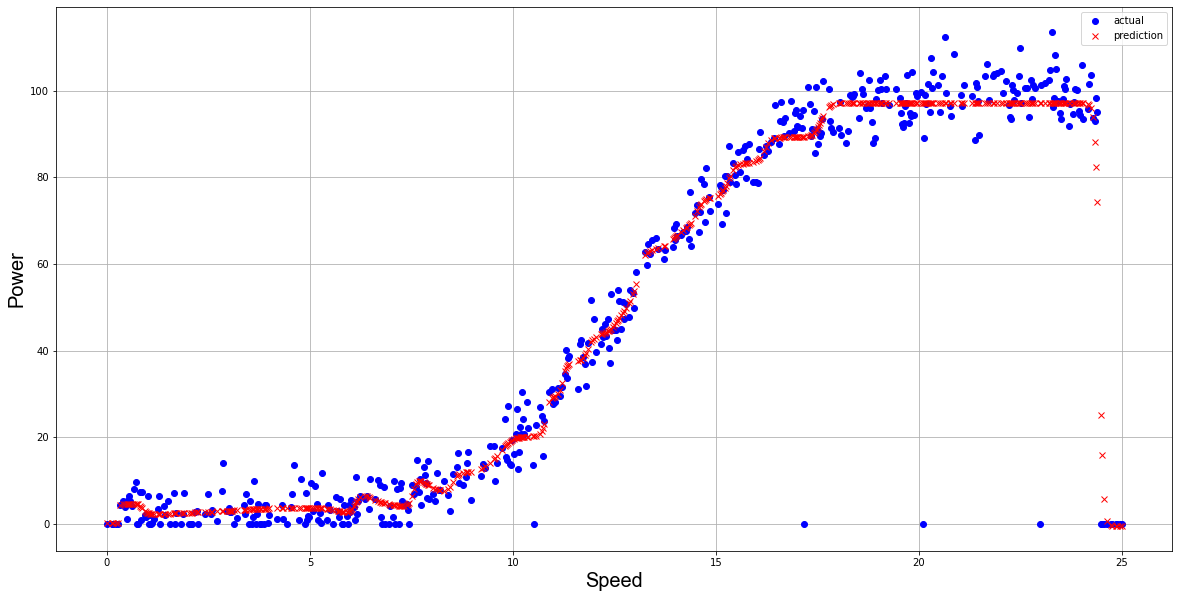

In [8]:
# plot the graphs

# size and font for labels
axis_font = {'fontname':'Arial', 'size':'20'}
# size of graph
plt.figure(figsize=(20,10))
# plotting the data
plt.plot(powerProductionDataSet['speed'], powerProductionDataSet['power'], 'bo',label='actual')
# plotting the predictions
plt.plot(powerProductionDataSet['speed'], model.predict(powerProductionDataSet['speed']), 'rx',label='prediction')
# plotting both lines
plt.legend();
# adding a grid and labels to x and y axis
plt.grid(True)
plt.xlabel("Speed", **axis_font)
plt.ylabel("Power", **axis_font)

In [9]:
# saving the model for web service
model.save('powerProduction.h5')